### Step 1: Load and Inspect the Data

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

# Load the dataset
loan_df = pd.read_csv('loan.csv')



### Check the shape of the dataset and preview first few rows

In [2]:
# Check the shape of the dataset
print("Shape of the dataset:", loan_df.shape)

# Preview the first few rows of the dataset
loan_df.head()

Shape of the dataset: (39717, 111)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Examine the distribution of the loan_status variable

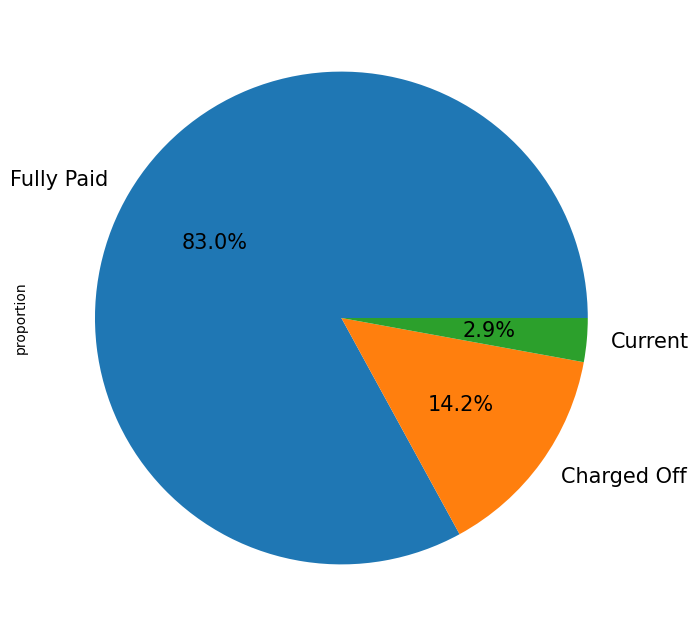

In [3]:
# Examine the distribution of the loan_status variable
loan_df['loan_status'].value_counts(normalize=True).plot(kind='pie', figsize=[10,8], autopct="%.1f%%", fontsize=15)
plt.show()

### Step 2: Data Cleaning

- Calculate the percentage of missing values for each column

In [4]:
# Calculate the percentage of missing values for each column
missing_data = dict((loan_df.isnull().sum() / len(loan_df.index) * 100).sort_values(ascending=False))
print(missing_data)

{'verification_status_joint': 100.0, 'annual_inc_joint': 100.0, 'mo_sin_old_rev_tl_op': 100.0, 'mo_sin_old_il_acct': 100.0, 'bc_util': 100.0, 'bc_open_to_buy': 100.0, 'avg_cur_bal': 100.0, 'acc_open_past_24mths': 100.0, 'inq_last_12m': 100.0, 'total_cu_tl': 100.0, 'inq_fi': 100.0, 'total_rev_hi_lim': 100.0, 'all_util': 100.0, 'max_bal_bc': 100.0, 'open_rv_24m': 100.0, 'open_rv_12m': 100.0, 'il_util': 100.0, 'total_bal_il': 100.0, 'mths_since_rcnt_il': 100.0, 'open_il_24m': 100.0, 'open_il_12m': 100.0, 'open_il_6m': 100.0, 'open_acc_6m': 100.0, 'tot_cur_bal': 100.0, 'tot_coll_amt': 100.0, 'mo_sin_rcnt_rev_tl_op': 100.0, 'mo_sin_rcnt_tl': 100.0, 'mort_acc': 100.0, 'num_rev_tl_bal_gt_0': 100.0, 'total_bc_limit': 100.0, 'total_bal_ex_mort': 100.0, 'tot_hi_cred_lim': 100.0, 'percent_bc_gt_75': 100.0, 'pct_tl_nvr_dlq': 100.0, 'num_tl_op_past_12m': 100.0, 'num_tl_90g_dpd_24m': 100.0, 'num_tl_30dpd': 100.0, 'num_tl_120dpd_2m': 100.0, 'num_sats': 100.0, 'num_rev_accts': 100.0, 'mths_since_recen

### Checking columns which has Null Values

In [5]:
dict((loan_df.isnull().sum()/len(loan_df.index)*100).sort_values(ascending=False))

{'verification_status_joint': 100.0,
 'annual_inc_joint': 100.0,
 'mo_sin_old_rev_tl_op': 100.0,
 'mo_sin_old_il_acct': 100.0,
 'bc_util': 100.0,
 'bc_open_to_buy': 100.0,
 'avg_cur_bal': 100.0,
 'acc_open_past_24mths': 100.0,
 'inq_last_12m': 100.0,
 'total_cu_tl': 100.0,
 'inq_fi': 100.0,
 'total_rev_hi_lim': 100.0,
 'all_util': 100.0,
 'max_bal_bc': 100.0,
 'open_rv_24m': 100.0,
 'open_rv_12m': 100.0,
 'il_util': 100.0,
 'total_bal_il': 100.0,
 'mths_since_rcnt_il': 100.0,
 'open_il_24m': 100.0,
 'open_il_12m': 100.0,
 'open_il_6m': 100.0,
 'open_acc_6m': 100.0,
 'tot_cur_bal': 100.0,
 'tot_coll_amt': 100.0,
 'mo_sin_rcnt_rev_tl_op': 100.0,
 'mo_sin_rcnt_tl': 100.0,
 'mort_acc': 100.0,
 'num_rev_tl_bal_gt_0': 100.0,
 'total_bc_limit': 100.0,
 'total_bal_ex_mort': 100.0,
 'tot_hi_cred_lim': 100.0,
 'percent_bc_gt_75': 100.0,
 'pct_tl_nvr_dlq': 100.0,
 'num_tl_op_past_12m': 100.0,
 'num_tl_90g_dpd_24m': 100.0,
 'num_tl_30dpd': 100.0,
 'num_tl_120dpd_2m': 100.0,
 'num_sats': 100.0,
 'n

- Dropping Columns which has null values

In [6]:
loan_df = loan_df.loc[:,loan_df.notnull().sum()!=0]
loan_df.shape

(39717, 57)

- Identify columns with low variability (binary columns)


In [7]:

# Identify and drop columns with low variability (binary columns)
for col in loan_df.columns:
    if len(loan_df[col].unique()) <= 2:
        print('Unique values for', col, 'are:', loan_df[col].unique())


Unique values for term are: [' 36 months' ' 60 months']
Unique values for pymnt_plan are: ['n']
Unique values for initial_list_status are: ['f']
Unique values for collections_12_mths_ex_med are: [ 0. nan]
Unique values for policy_code are: [1]
Unique values for application_type are: ['INDIVIDUAL']
Unique values for acc_now_delinq are: [0]
Unique values for chargeoff_within_12_mths are: [ 0. nan]
Unique values for delinq_amnt are: [0]
Unique values for tax_liens are: [ 0. nan]


### Drop columns with low variability (binary columns)

In [8]:
loan_df = loan_df.drop(['tax_liens', 'application_type', 'pymnt_plan', 'policy_code', 
                        'collections_12_mths_ex_med', 'delinq_amnt', 'chargeoff_within_12_mths', 
                        'initial_list_status', 'acc_now_delinq'], axis=1)
print("Shape after dropping low variability columns:", loan_df.shape)

Shape after dropping low variability columns: (39717, 48)


### Step 3: Feature Engineering

### Create target variable 'default'


In [9]:
# Create target variable 'default'
loan_df['default'] = loan_df['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)

- Extract numerical values from sub_grade and create new features

In [10]:
# Extract numerical values from sub_grade and create new features
loan_df['sub_grade_no'] = loan_df['sub_grade'].apply(lambda x: int(x[1]))
loan_df['issue_year'] = pd.to_datetime(loan_df['issue_d'], format='%b-%y').dt.year
loan_df['issue_month'] = pd.to_datetime(loan_df['issue_d'], format='%b-%y').dt.month
loan_df['earliest_cr_line_year'] = pd.to_datetime(loan_df['earliest_cr_line'], format='%b-%y').dt.year


- Convert interest rate to float



In [11]:
# Convert interest rate to float
loan_df['int_rate'] = loan_df['int_rate'].apply(lambda x: float(x[:-1]))


### Remove redundant columns


In [12]:
# Remove redundant columns
redundant_cols = ['funded_amnt', 'funded_amnt_inv']
loan_df = loan_df.drop(redundant_cols, axis=1, errors='ignore')
print("Shape after removing redundant columns:", loan_df.shape)

Shape after removing redundant columns: (39717, 51)


### Drop more irrelevant columns


In [13]:
# Drop more irrelevant columns
drop_cols = ['issue_d', 'revol_bal', 'revol_util', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
             'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 
             'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 
             'zip_code']
loan_df = loan_df.drop(drop_cols, axis=1)
print("Shape after dropping irrelvant columns:", loan_df.shape)

Shape after dropping irrelvant columns: (39717, 34)


### Step 4: Exploratory Data Analysis (EDA)

## Univariate Analysis

- Plot distributions of numerical variables

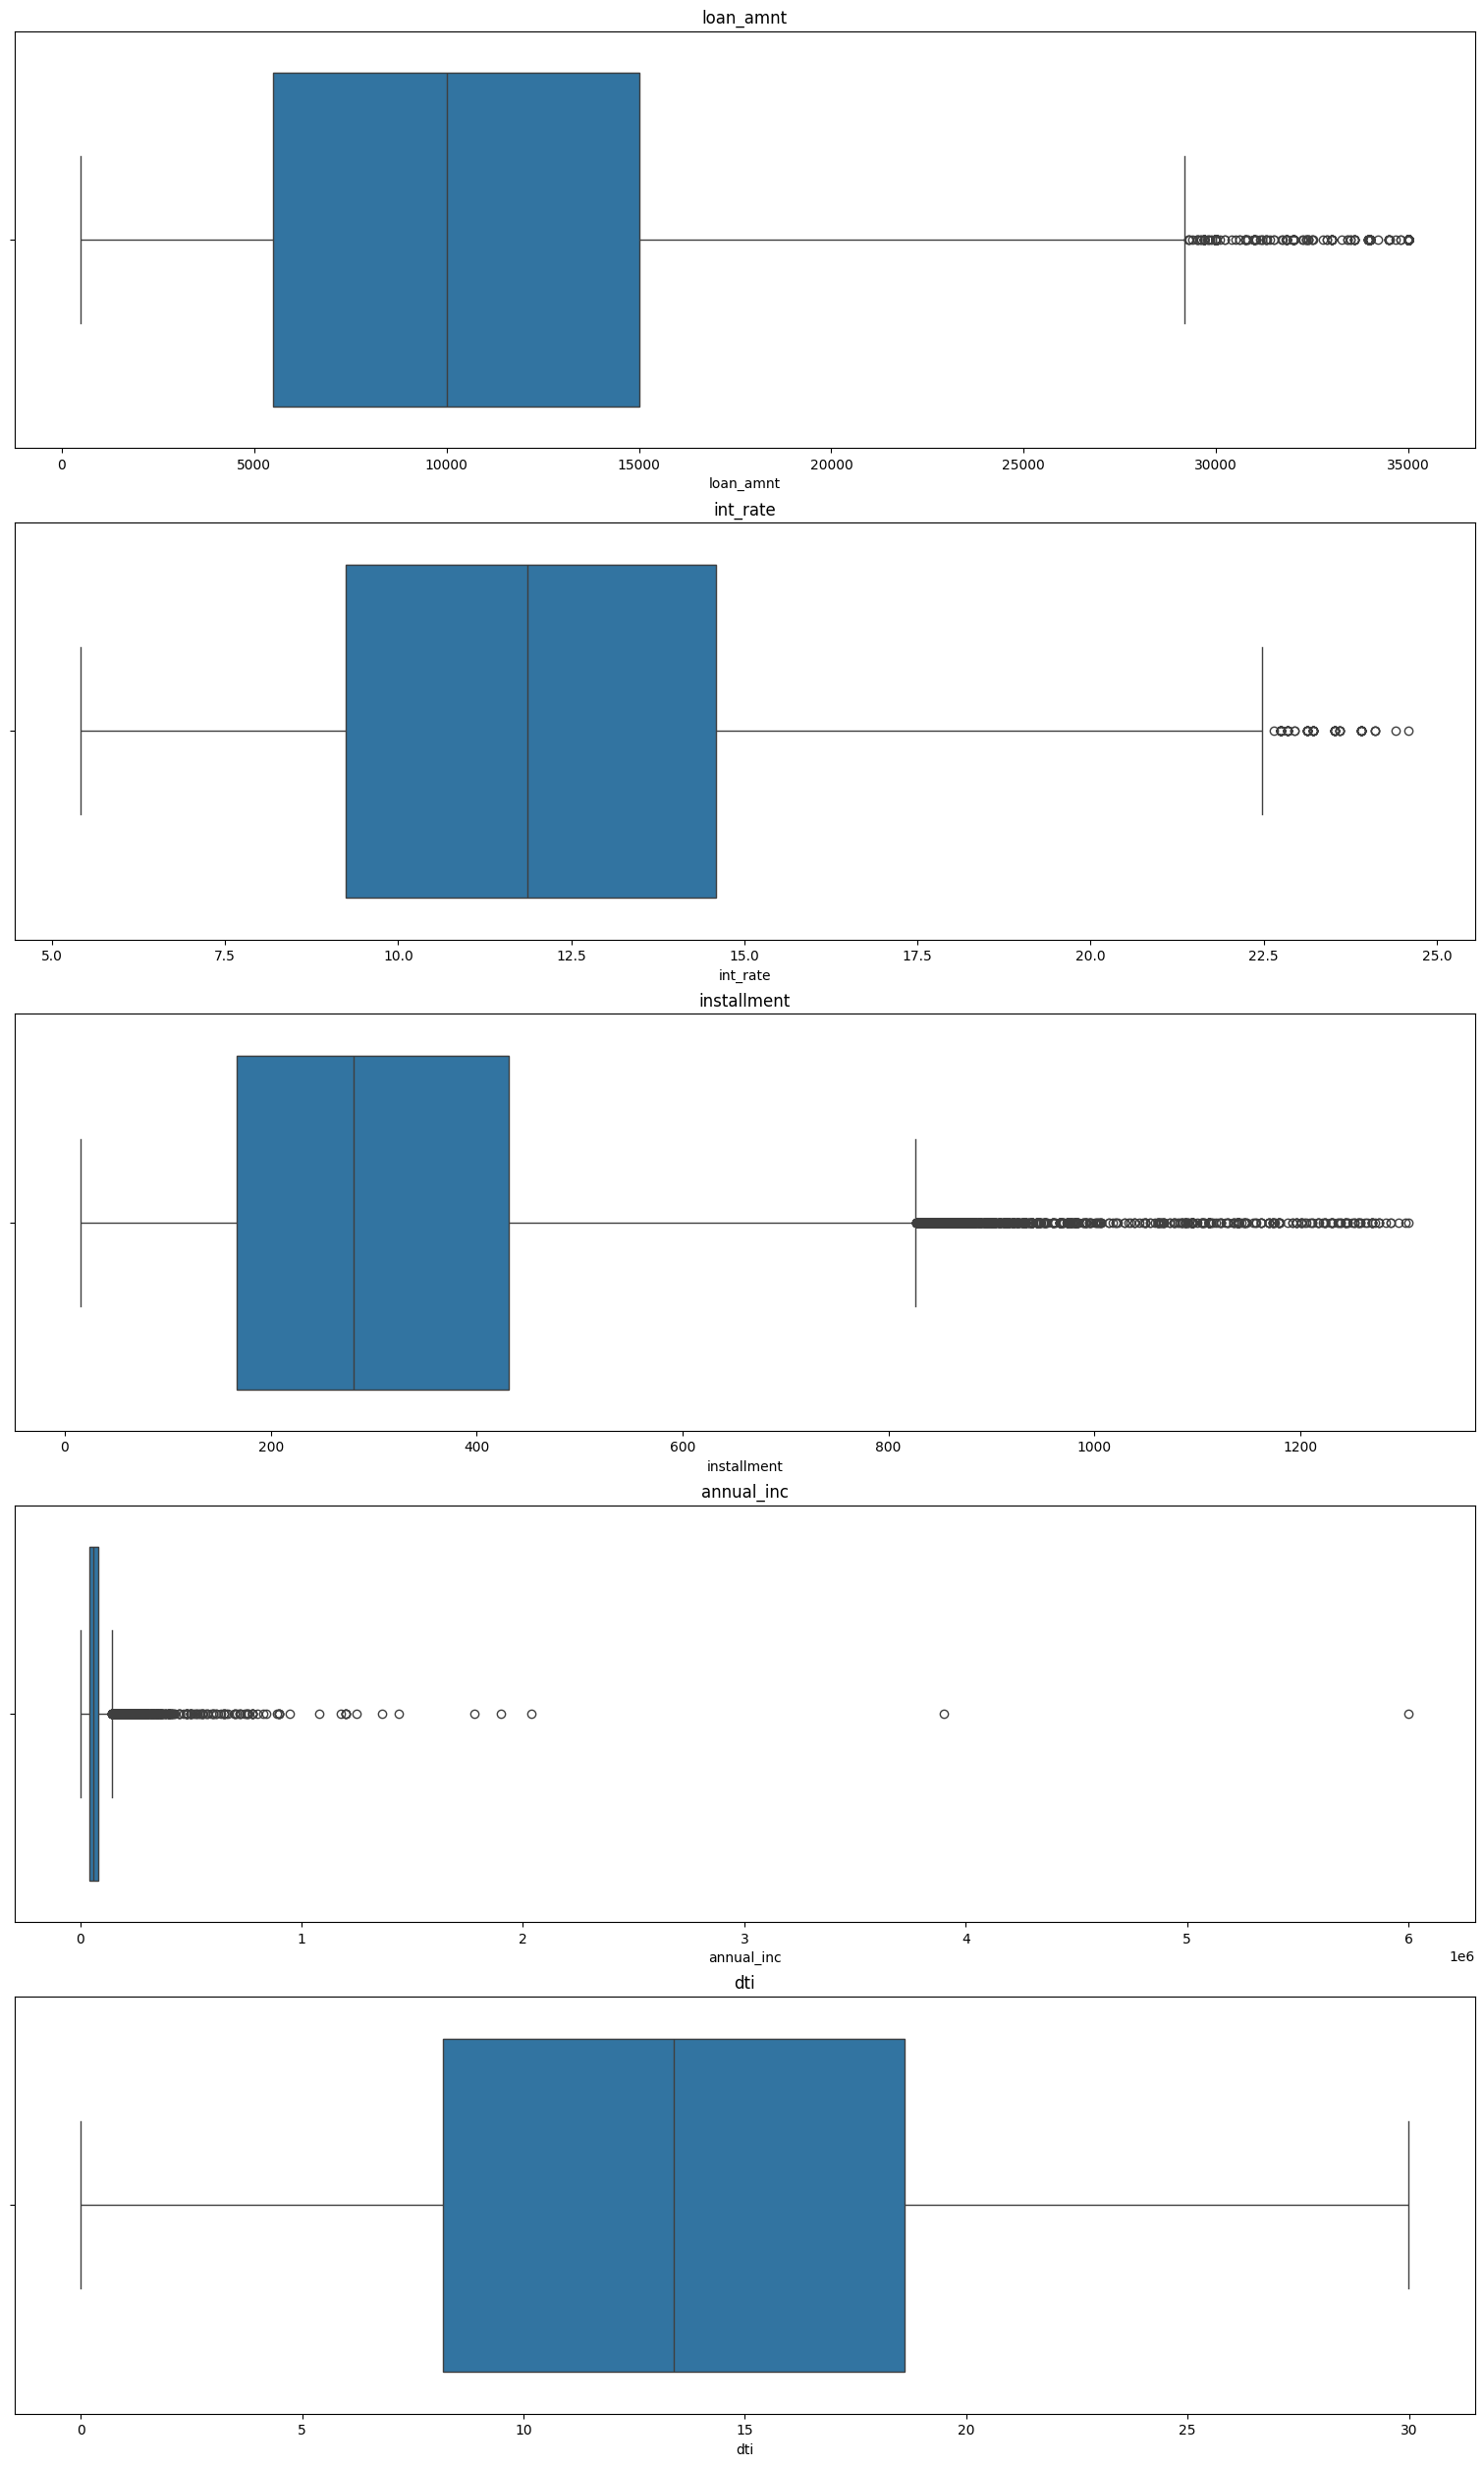

In [14]:
# Plot distributions of numerical variables
numeric_cols = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti']
fig, ax = plt.subplots(len(numeric_cols), 1, figsize=[15, len(numeric_cols) * 5], constrained_layout=True)
for i, col in enumerate(numeric_cols):
    sns.boxplot(data=loan_df[col], orient='h', ax=ax[i])
    ax[i].set_title(col)
plt.show()


## Bivariate Analysis

- Scatter plots for numerical variables against the target variable

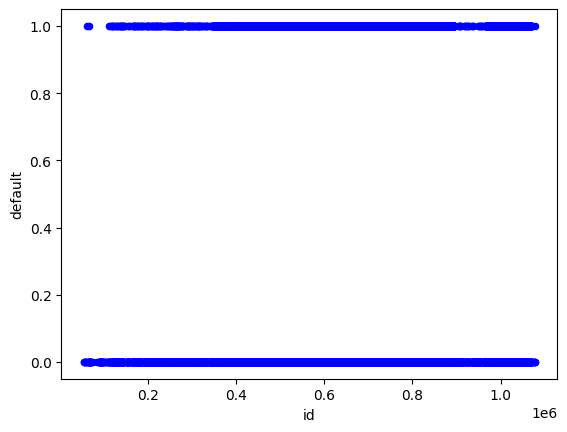

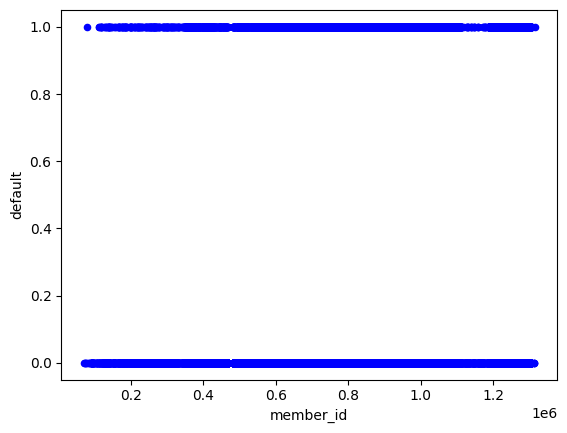

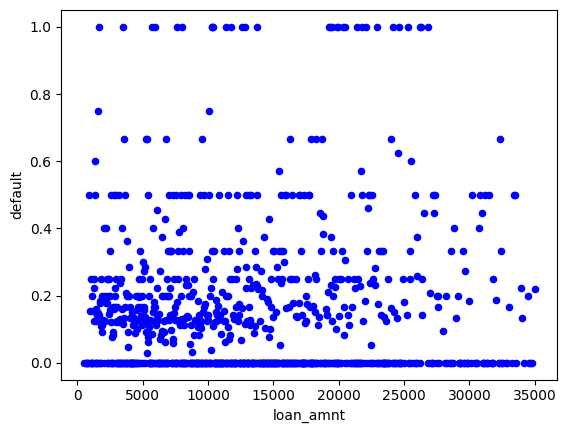

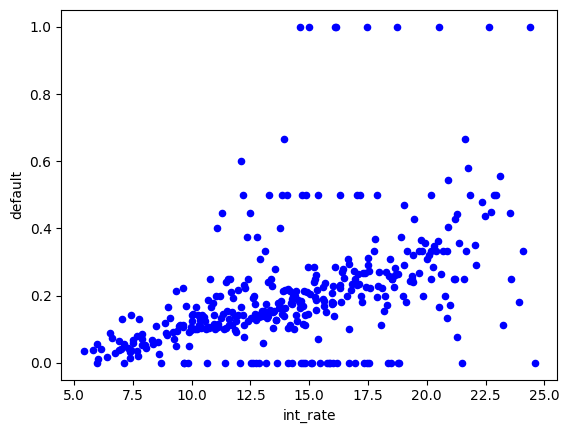

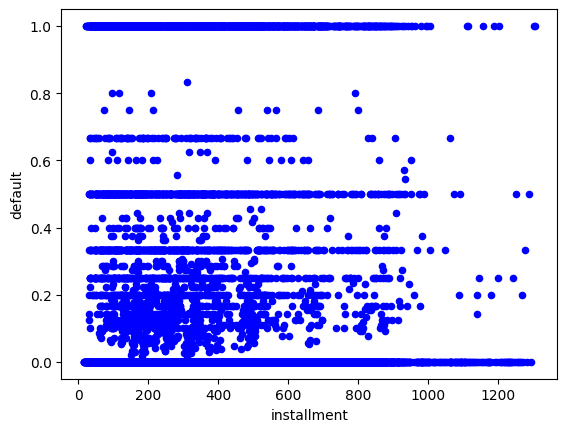

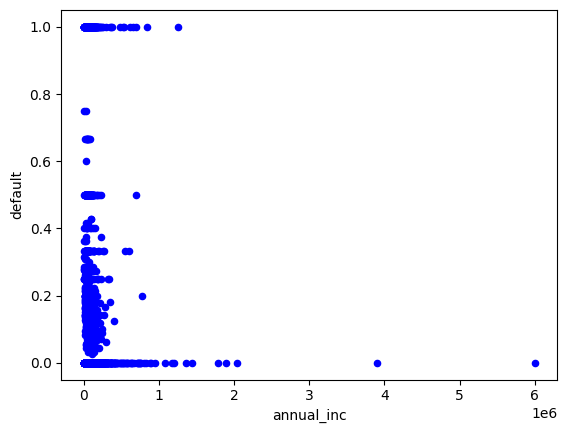

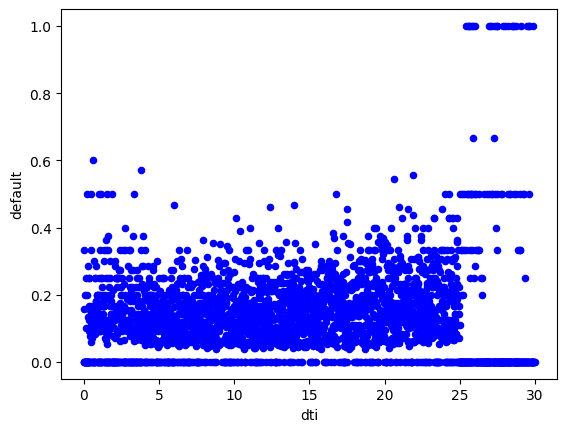

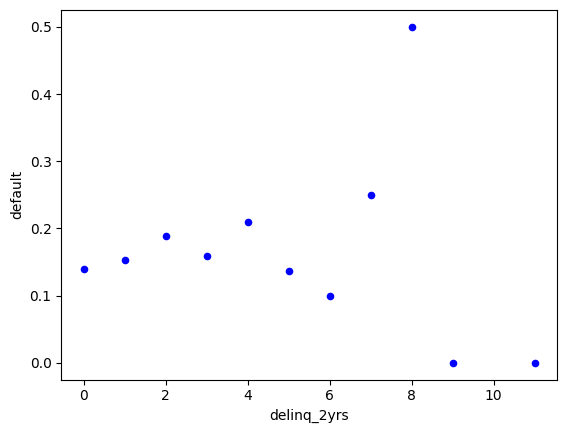

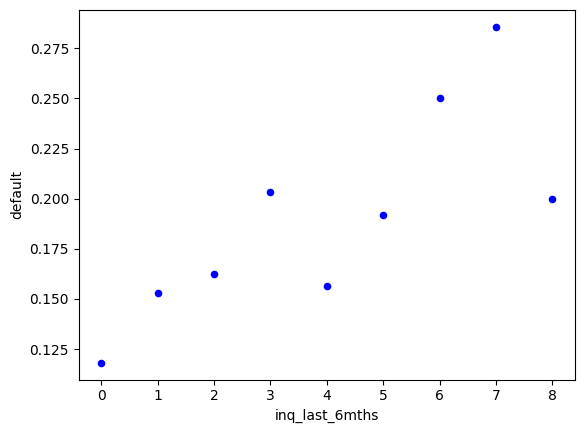

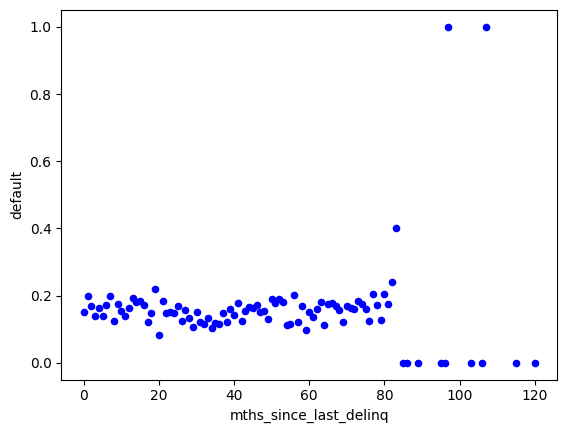

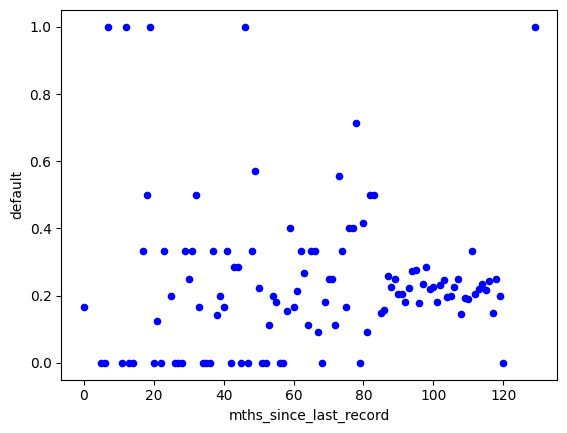

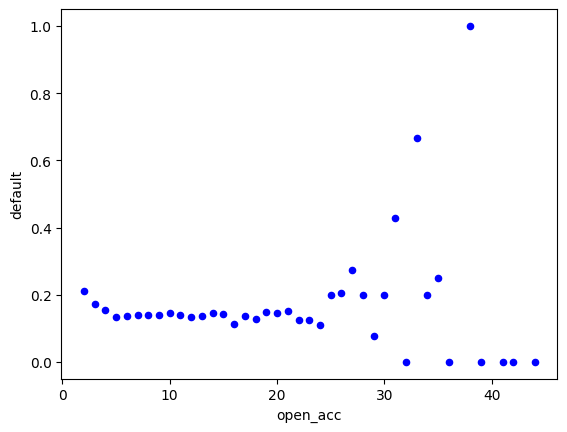

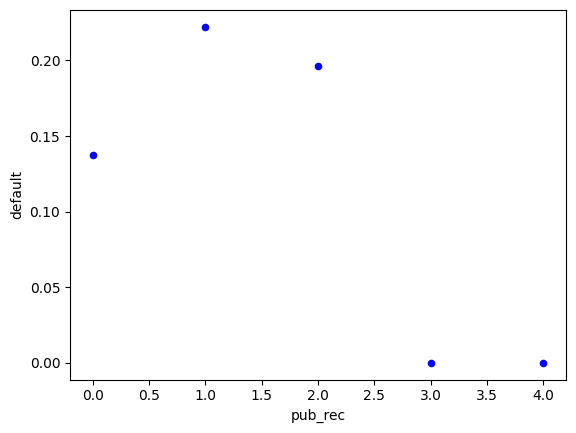

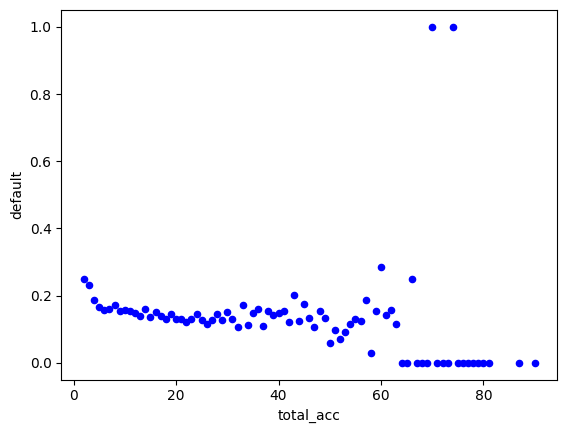

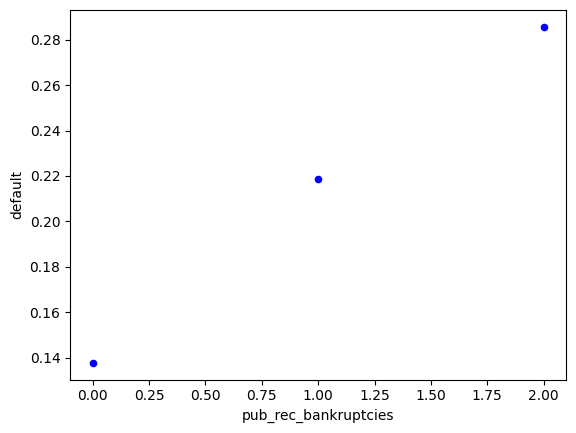

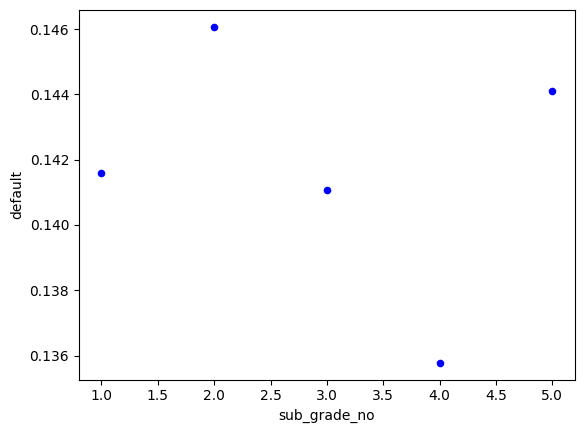

In [15]:
# Scatter plots for numerical variables against the target variable
for col in loan_df.select_dtypes(['int64', 'float64']).columns:
    if col != 'default':
        loan_df.groupby(col)['default'].mean().reset_index().plot.scatter(x=col, y='default', c='blue')
        plt.show()




- Checking datatypes of loan data frame

In [16]:
loan_df.dtypes

id                          int64
member_id                   int64
loan_amnt                   int64
term                       object
int_rate                  float64
installment               float64
grade                      object
sub_grade                  object
emp_title                  object
emp_length                 object
home_ownership             object
annual_inc                float64
verification_status        object
loan_status                object
url                        object
desc                       object
purpose                    object
title                      object
addr_state                 object
dti                       float64
delinq_2yrs                 int64
earliest_cr_line           object
inq_last_6mths              int64
mths_since_last_delinq    float64
mths_since_last_record    float64
open_acc                    int64
pub_rec                     int64
total_acc                   int64
pub_rec_bankruptcies      float64
default       

In [17]:
loan_df['mths_since_last_delinq_bin']=pd.cut(loan_df.mths_since_last_delinq,10)

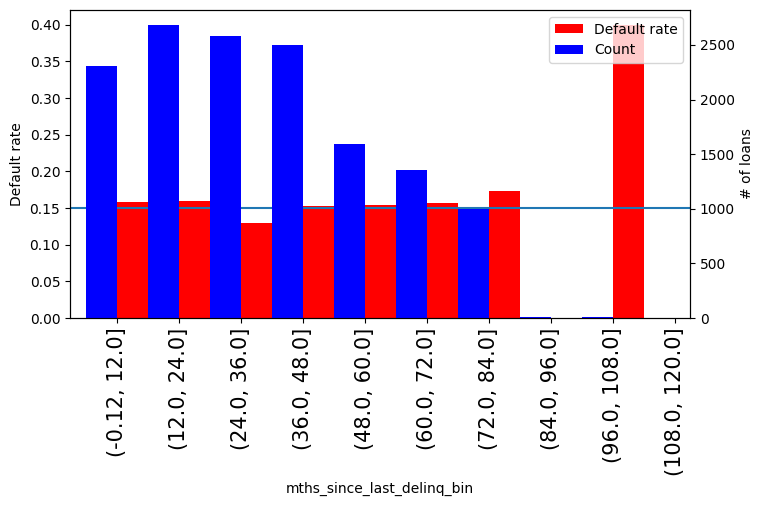

In [18]:
fig = plt.figure(figsize=(8,4),dpi=100)
delinq_df = loan_df.groupby('mths_since_last_delinq_bin').agg({'default':['mean','count']})
ax=fig.add_subplot()
ax2 = ax.twinx()
ax.set_ylabel('Default rate')
for ax_c in (ax, ax2):
    ax_c.tick_params(axis='x',  labelsize=15)
l = delinq_df[('default','mean')].plot(kind='bar', color='red', ax=ax,  position=0,label='Default rate')

m = delinq_df[('default','count')].plot(kind='bar', color='blue', ax=ax2, position=1,label='Count')
ax2.set_ylabel('# of loans')
ax.axhline(0.15)

handles,labels = [],[]
for ax in fig.axes:
    for h,l in zip(*ax.get_legend_handles_labels()):
        handles.append(h)
        labels.append(l)

plt.legend(handles,labels)

In [19]:
loan_df.groupby('mths_since_last_delinq_bin')['default'].count()

mths_since_last_delinq_bin
(-0.12, 12.0]     2310
(12.0, 24.0]      2686
(24.0, 36.0]      2580
(36.0, 48.0]      2500
(48.0, 60.0]      1590
(60.0, 72.0]      1354
(72.0, 84.0]      1002
(84.0, 96.0]         6
(96.0, 108.0]        5
(108.0, 120.0]       2
Name: default, dtype: int64

### Dropping columns which has no relation to default rate

In [20]:
loan_df.drop([ 'mths_since_last_record','open_acc', 'pub_rec','total_acc'], axis=1, inplace=True)

In [21]:
loan_df.shape

(39717, 31)

In [22]:
loan_df.select_dtypes(['int64','float64']).columns

Index(['id', 'member_id', 'loan_amnt', 'int_rate', 'installment', 'annual_inc',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'pub_rec_bankruptcies', 'default', 'sub_grade_no'],
      dtype='object')

- Status of current loans is not known, so current loan rows can be dropped.

In [23]:
loan_df=loan_df[loan_df['loan_status']!='Current']
loan_df.shape

(38577, 31)

- Dealing with missing values and Outlier treatment

In [24]:
numeric_cols=['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti']

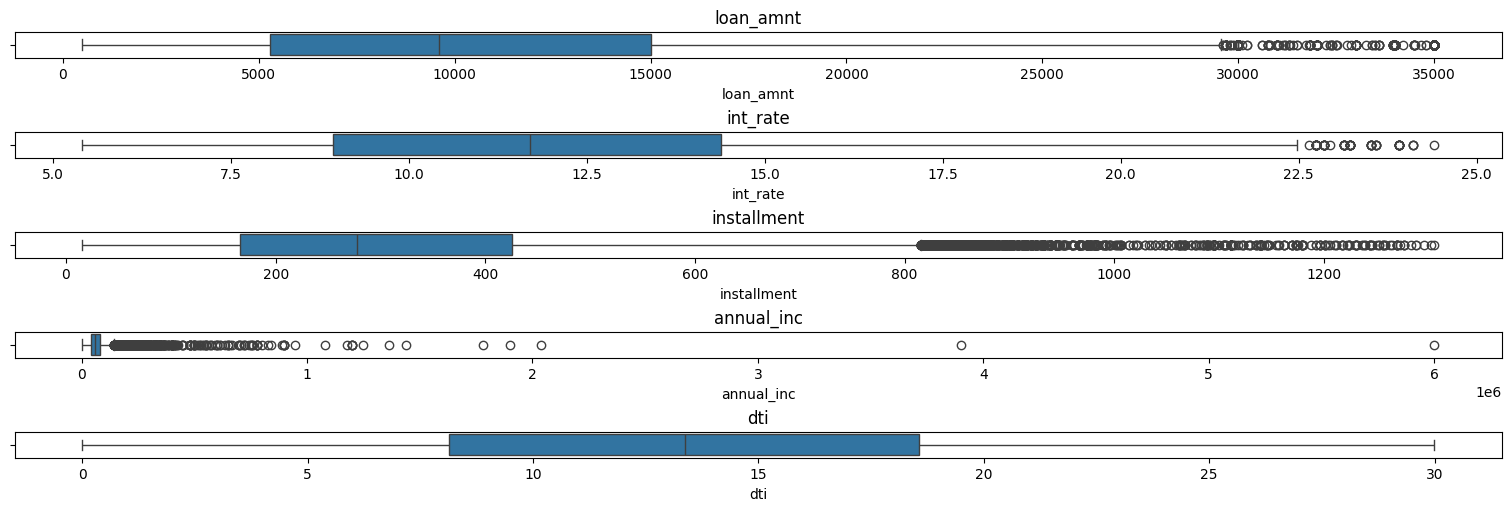

In [25]:
fig, ax = plt.subplots(5, 1, figsize=[15, 5], constrained_layout=True)
for axi, col in enumerate(numeric_cols):
    sns.boxplot(data=loan_df[col], orient='h', ax=ax[axi])
    ax[axi].set_title(col)

- Removing outliers from annual_inc

In [26]:
outlier_df = loan_df.loc[loan_df['annual_inc'] <= (np.quantile(loan_df['annual_inc'], 0.75) * 2)]
outlier_df.shape

(37384, 31)

- Removing outliers from installment

In [27]:
outlier_df = outlier_df.loc[outlier_df['installment'] <= (np.quantile(outlier_df['installment'], 0.75) * 2)]
outlier_df.shape

(36394, 31)

- Dropped Rows Percentage

In [28]:
print(f'Dropped row percentage:{(1-outlier_df.shape[0]/loan_df.shape[0])*100}%')

Dropped row percentage:5.65881224563859%


- Treating Missing Values

In [29]:
outlier_df.isnull().sum() / len(outlier_df)

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     0.060504
emp_length                    0.027697
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
loan_status                   0.000000
url                           0.000000
desc                          0.325686
purpose                       0.000000
title                         0.000302
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line              0.000000
inq_last_6mths                0.000000
mths_since_last_delinq        0.646892
pub_rec_bankruptcies          0.018025
default                  

In [30]:
outlier_df['emp_length'].fillna(outlier_df['emp_length'].mode().values[0], inplace=True)
outlier_df['pub_rec_bankruptcies'].fillna(outlier_df['pub_rec_bankruptcies'].median(), inplace=True)

- New Columns Creation

In [31]:
# bin numerical into categorical
# As there are outliers in annual_inc, qcut is used to create bins instead of cut
loan_df['annual_inc_cat'] = pd.qcut(loan_df.annual_inc, 5, labels=['very low', 'low', 'medium', 'high', 'very high'])

loan_df['loan_amnt_cat'] = pd.cut(loan_df.loan_amnt, 5, labels=['very low', 'low', 'medium', 'high', 'very high'])
loan_df['dti_cat'] = pd.cut(loan_df.dti, 5, labels=['very low', 'low', 'medium', 'high', 'very high'])
loan_df['int_rate_cat'] = pd.cut(loan_df.int_rate, 5, labels=['very low', 'low', 'medium', 'high', 'very high'])
loan_df['installment_cat'] = pd.cut(loan_df.installment, 5, labels=['very low', 'low', 'medium', 'high', 'very high'])

In [32]:
#Checking Dsitribution of Numerical Columns
loan_df[numeric_cols].describe()


,loan_amnt,int_rate,installment,annual_inc,dti
count,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000
mean,11047.025430,11.932219,322.466318,6.877797e+04,13.272727
std,7348.441646,3.691327,208.639215,6.421868e+04,6.673044
min,500.000000,5.420000,15.690000,4.000000e+03,0.000000
25%,5300.000000,8.940000,165.740000,4.000000e+04,8.130000
50%,9600.000000,11.710000,277.860000,5.886800e+04,13.370000
75%,15000.000000,14.380000,425.550000,8.200000e+04,18.560000
max,35000.000000,24.400000,1305.190000,6.000000e+06,29.990000


In [33]:
target_cols = ['loan_status', 'default']
id_cols = ['id', 'member_id']
numeric_n_cols = ['annual_inc',  'dti', 'installment',  'int_rate',  'loan_amnt']
numeric_cat_cols = [f'{x}_cat' for x in numeric_n_cols]
categorical_cols = [x for x in loan_df.columns if x not in (numeric_cols + numeric_cat_cols + id_cols + target_cols)]
non_id_cols = target_cols + numeric_cols + categorical_cols

- Box plots for categorical variables against the target variable


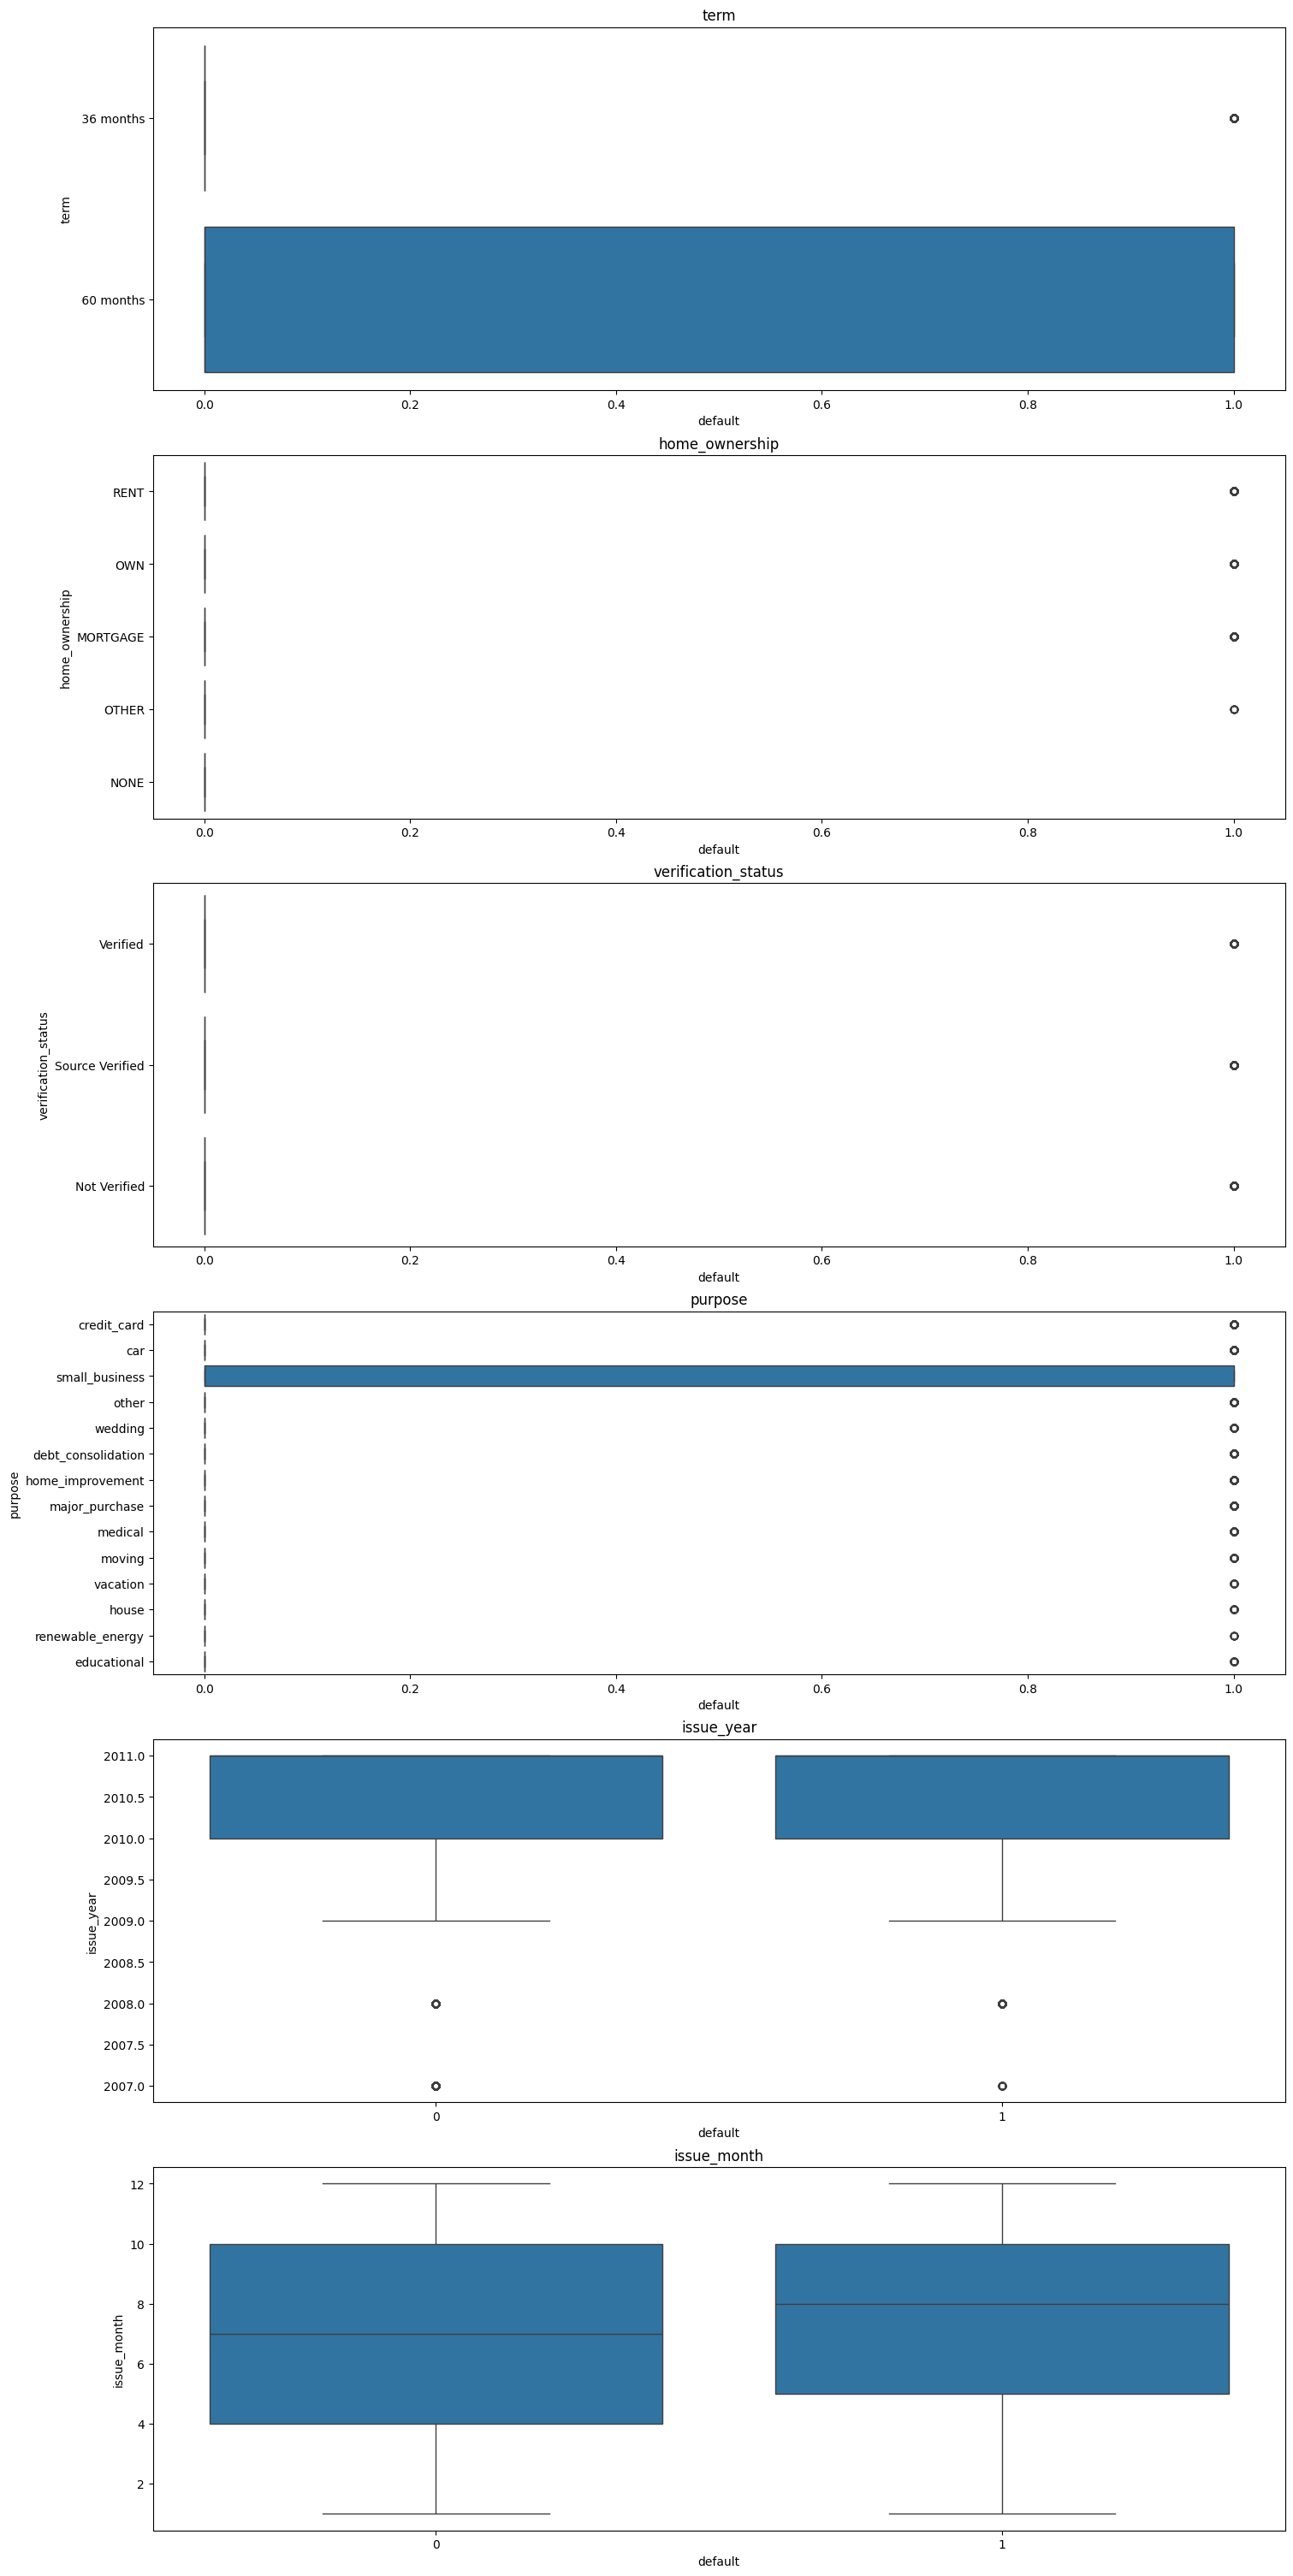

In [34]:
# Box plots for categorical variables against the target variable
cat_cols = ['term', 'home_ownership', 'verification_status', 'purpose', 'issue_year', 'issue_month']
fig, ax = plt.subplots(len(cat_cols), 1, figsize=[15, len(cat_cols) * 5], constrained_layout=True)
for i, col in enumerate(cat_cols):
    sns.boxplot(data=loan_df, x='default', y=col, ax=ax[i])
    ax[i].set_title(col)
plt.show()

## Multivariate Analysis

- Correlation heatmap

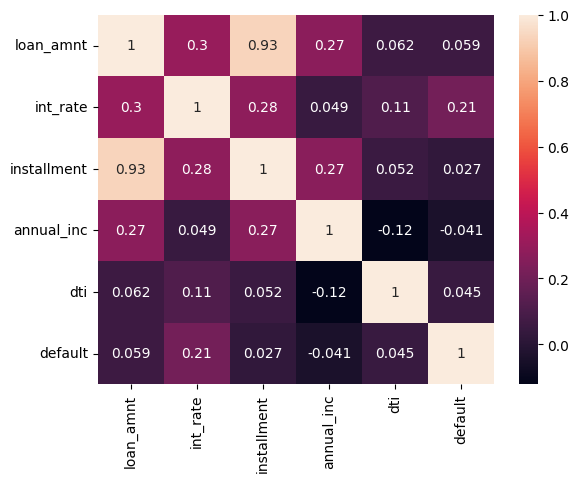

In [35]:
# Correlation heatmap
sns.heatmap(loan_df[numeric_cols + ['default']].corr(), annot=True)
plt.show()


## Distribution Plots

In [36]:
# Define distribution_cols
distribution_cols = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 
                     'pub_rec_bankruptcies', 'issue_year', 'issue_month', 'earliest_cr_line_year']

- KDE Plots

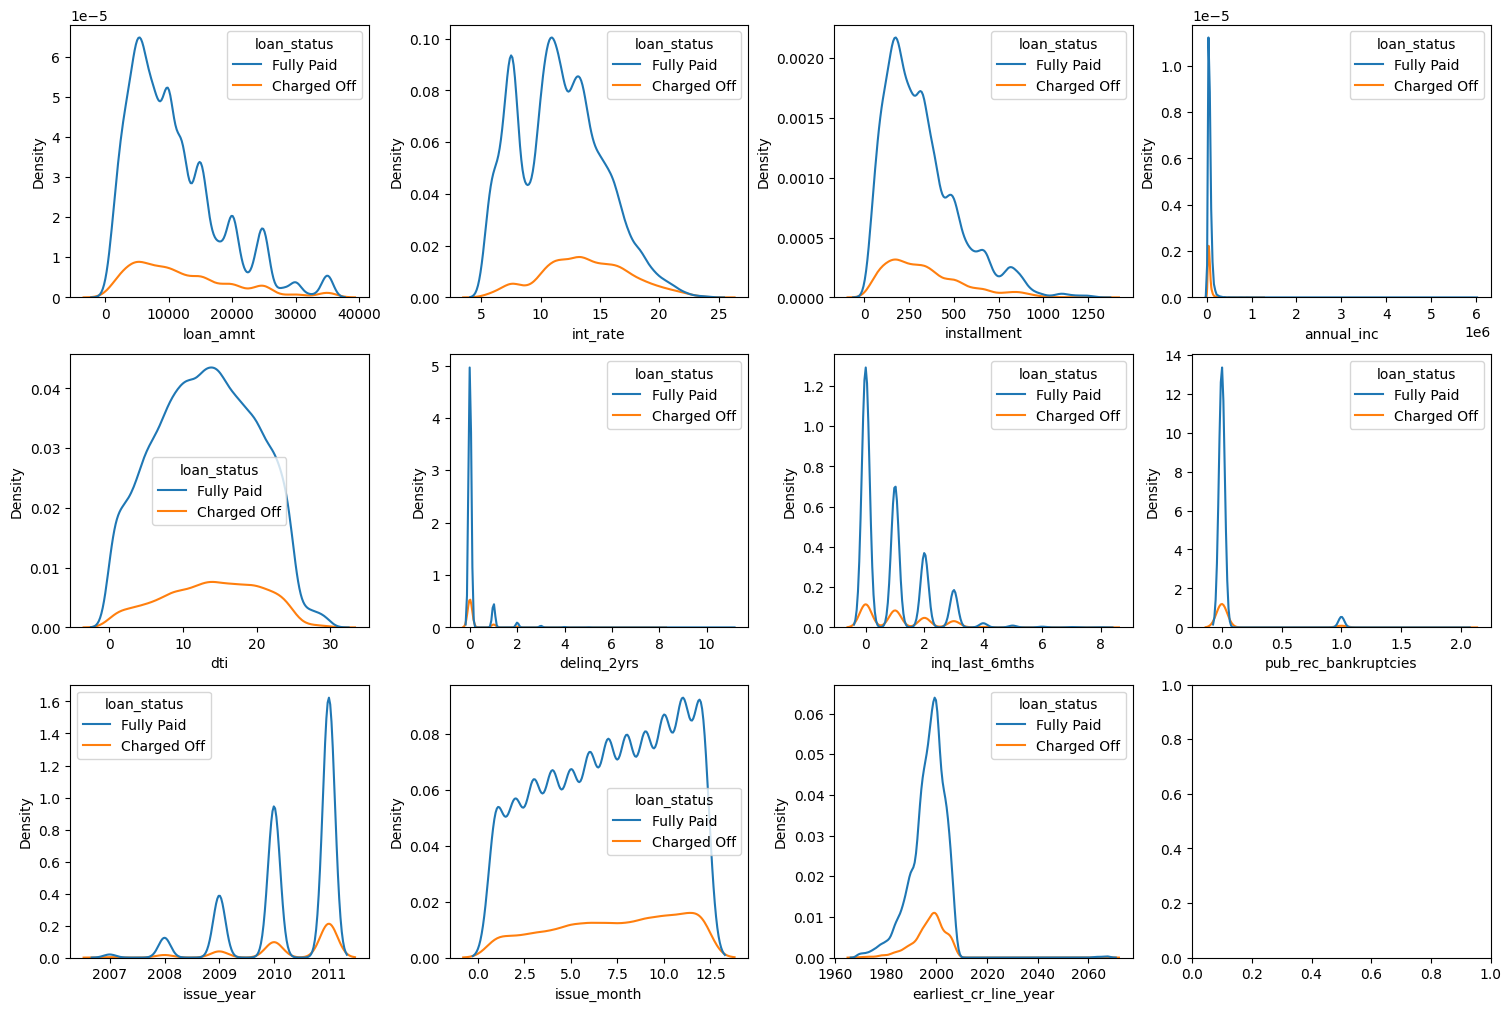

In [37]:

# KDE plots for distributions of numerical variables
fig, ax = plt.subplots(len(distribution_cols)//4+1, 4, figsize=[15, 10], constrained_layout=True)
for i, col in enumerate(distribution_cols):
    sns.kdeplot(data=loan_df, x=col, ax=ax[i//4, i%4], hue='loan_status')
plt.show()



### Distribution Plots without Outliers

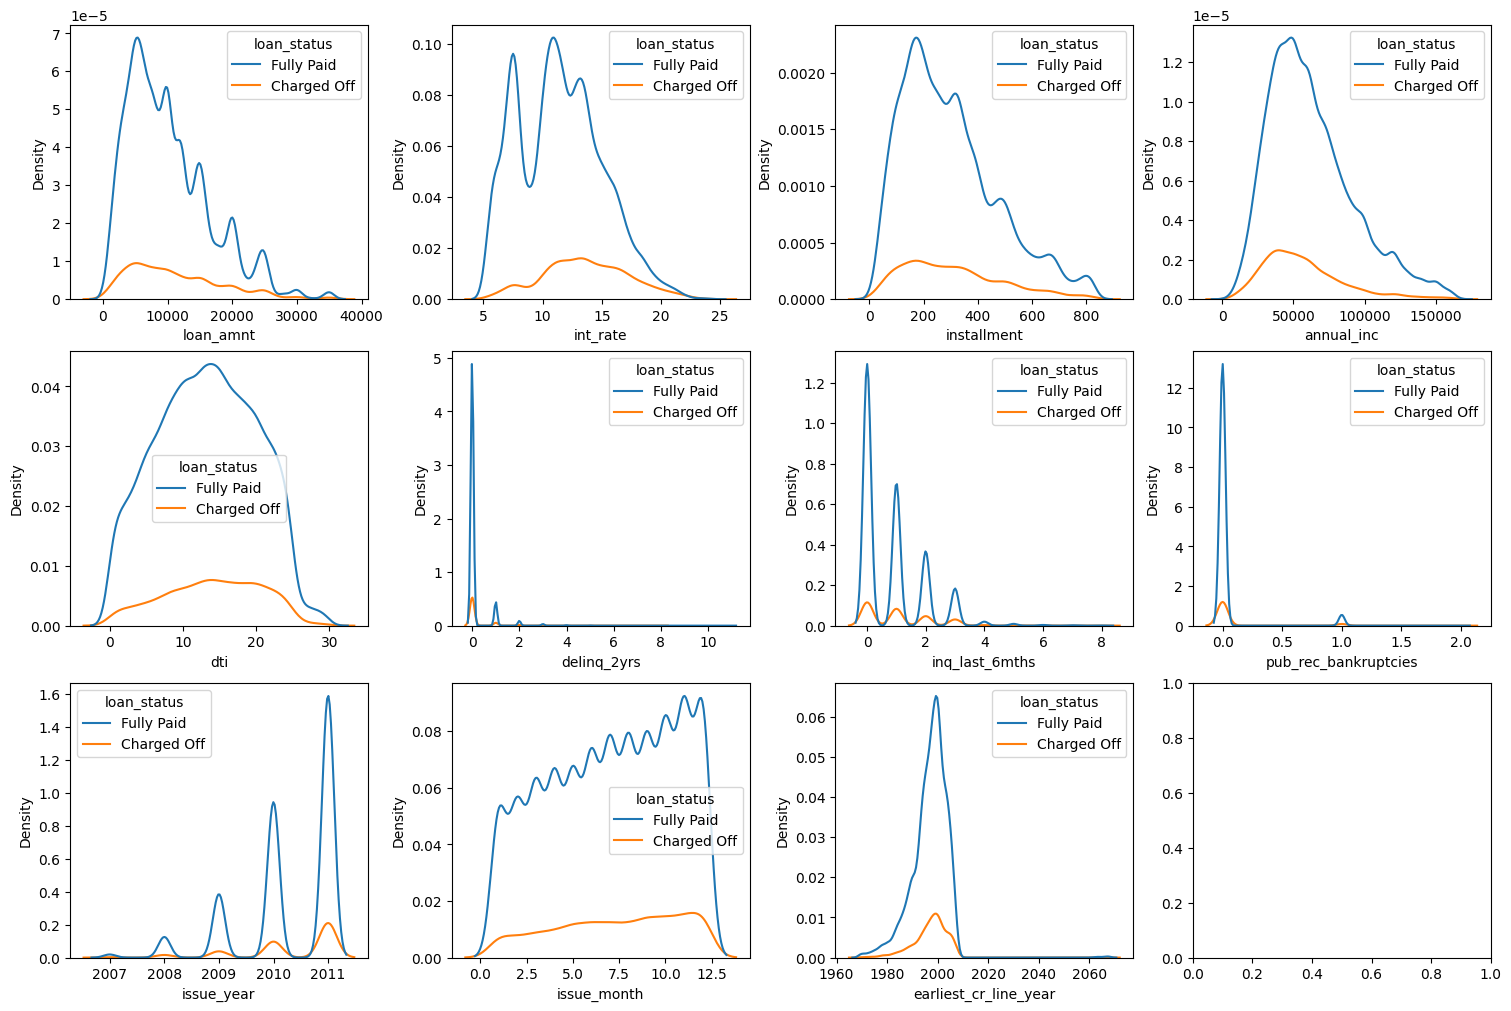

In [38]:
# distributions without outliers
fig, ax = plt.subplots(len(distribution_cols)//4+1,4, figsize=[15, 10], constrained_layout=True)
for axi, col in enumerate(distribution_cols):
    sns.kdeplot(data=outlier_df, x=col, ax=ax[axi//4,axi%4], hue='loan_status')

<Axes: xlabel='issue_month', ylabel='count'>

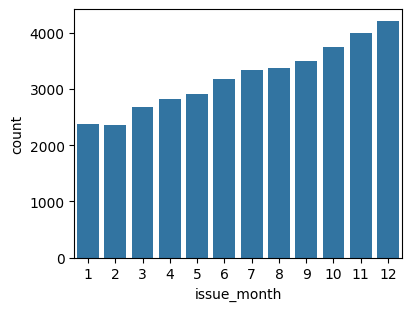

In [39]:
 fig, ax = plt.subplots(figsize=[4, 3], constrained_layout=True)
sns.countplot(data=loan_df, x='issue_month')

<Axes: xlabel='issue_year', ylabel='count'>

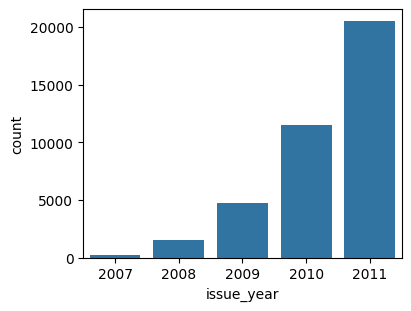

In [40]:
 fig, ax = plt.subplots(figsize=[4, 3], constrained_layout=True)
sns.countplot(data=loan_df, x='issue_year')

### Count plots for categorical variables

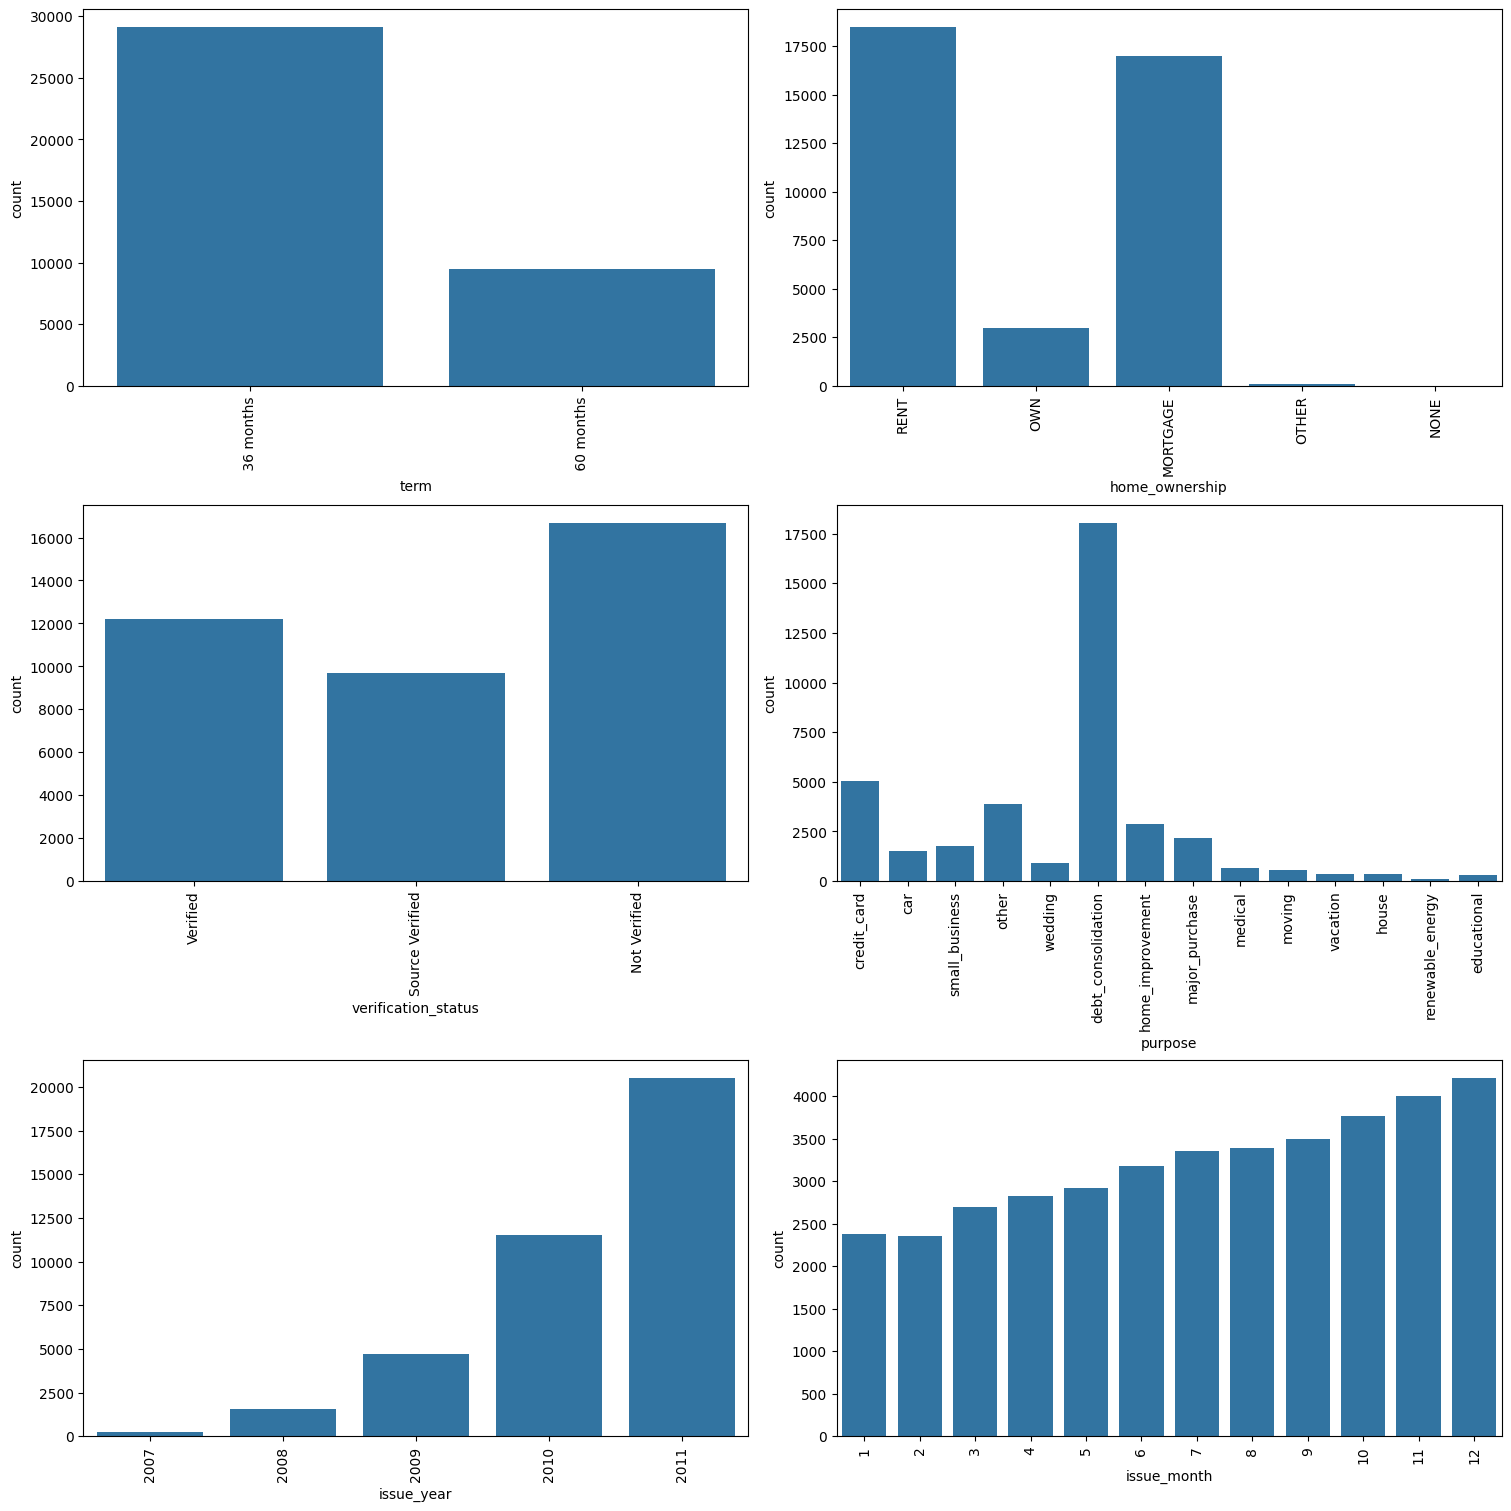

In [41]:
# plt.xticks(rotation=45)
cat_cols=['term','home_ownership', 'verification_status', 'purpose','issue_year','issue_month']
fig, ax = plt.subplots(math.ceil(len(cat_cols)/2),2, figsize=[15, 15], constrained_layout=True)
for axi, col in enumerate(cat_cols):
    plot = sns.countplot(data=loan_df, x=col, ax=ax[axi//2,axi%2] )
    plt.setp(plot.get_xticklabels(), rotation=90)

#### Observations
- Loan Term: Majority of the loans are of 36 months.
- Loan Purpose: Most loans are for debt consolidation.
- Accommodation: Most borrowers live in rented accommodations or mortgaged properties.
- Income Verification: Income is not verified for most borrowers, followed by borrowers with verified but unverified income sources.
- Trends: An increasing trend is observed both month-wise (January to December) and year-wise (2007 to 2011).

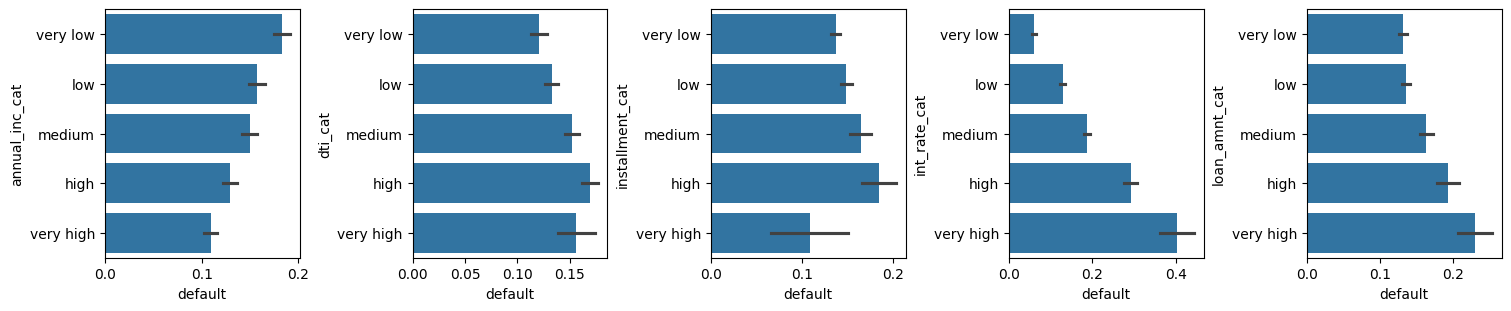

In [42]:
fig, ax = plt.subplots(1, 5, figsize=[15, 3], constrained_layout=True)
for axi, col in enumerate(numeric_cat_cols):
    sns.barplot(data=loan_df, y=col, ax=ax[axi], x='default', estimator=np.mean, orient='h')

#### Observations
- Higher annual income correlates with a lower default rate.
- Borrowers with annual incomes above $15,000 are less likely to default.
- Higher debt-to-income (DTI) ratios are associated with higher default rates.
- Higher interest rates are linked to higher default rates.
- Larger loan amounts tend to have higher default rates.







In [43]:
loan_df['annual_inc_bin']=pd.cut(loan_df.annual_inc,[0,10_000,15_000,20_000,40_000,50_000,75_000, 1_00_000,60_00_000])

In [44]:
loan_df.groupby('annual_inc_bin')['default'].count()

annual_inc_bin
(0, 10000]              98
(10000, 15000]         397
(15000, 20000]         685
(20000, 40000]        8518
(40000, 50000]        5691
(50000, 75000]       11668
(75000, 100000]       6039
(100000, 6000000]     5481
Name: default, dtype: int64

<Axes: xlabel='default', ylabel='annual_inc_bin'>

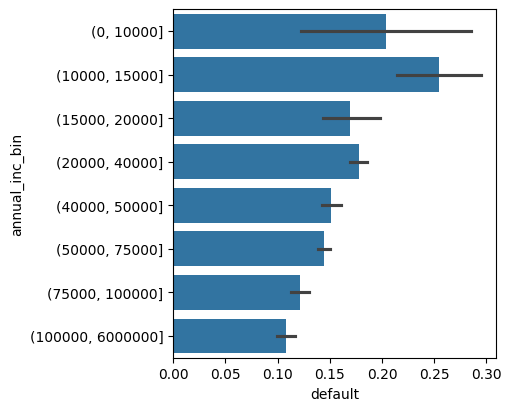

In [45]:
fig, ax = plt.subplots(figsize=[5, 4], constrained_layout=True)
sns.barplot(data=loan_df, y='annual_inc_bin', x='default', estimator=np.mean, orient='h', ax=ax)

In [46]:
loan_df['annual_inc_bin']=pd.cut(loan_df.annual_inc,[0,10_000,15_000,20_000,40_000,50_000,75_000, 1_00_000,60_00_000])

In [47]:
loan_df.groupby('annual_inc_bin')['default'].count()

annual_inc_bin
(0, 10000]              98
(10000, 15000]         397
(15000, 20000]         685
(20000, 40000]        8518
(40000, 50000]        5691
(50000, 75000]       11668
(75000, 100000]       6039
(100000, 6000000]     5481
Name: default, dtype: int64

In [48]:
loan_df.groupby('mths_since_last_delinq_bin')['default'].count()

mths_since_last_delinq_bin
(-0.12, 12.0]     2262
(12.0, 24.0]      2608
(24.0, 36.0]      2504
(36.0, 48.0]      2435
(48.0, 60.0]      1561
(60.0, 72.0]      1317
(72.0, 84.0]       973
(84.0, 96.0]         6
(96.0, 108.0]        4
(108.0, 120.0]       2
Name: default, dtype: int64

<Axes: xlabel='default', ylabel='annual_inc_bin'>

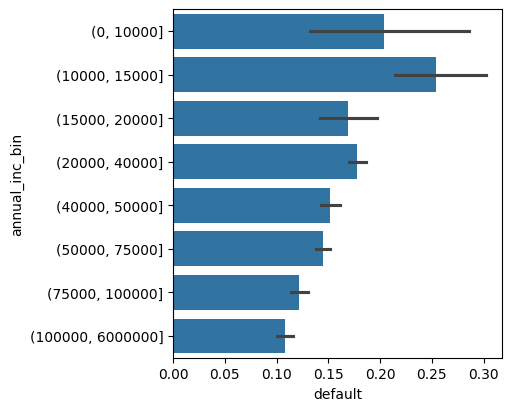

In [49]:
fig, ax = plt.subplots(figsize=[5, 4], constrained_layout=True)
sns.barplot(data=loan_df, y='annual_inc_bin', x='default', estimator=np.mean, orient='h', ax=ax)

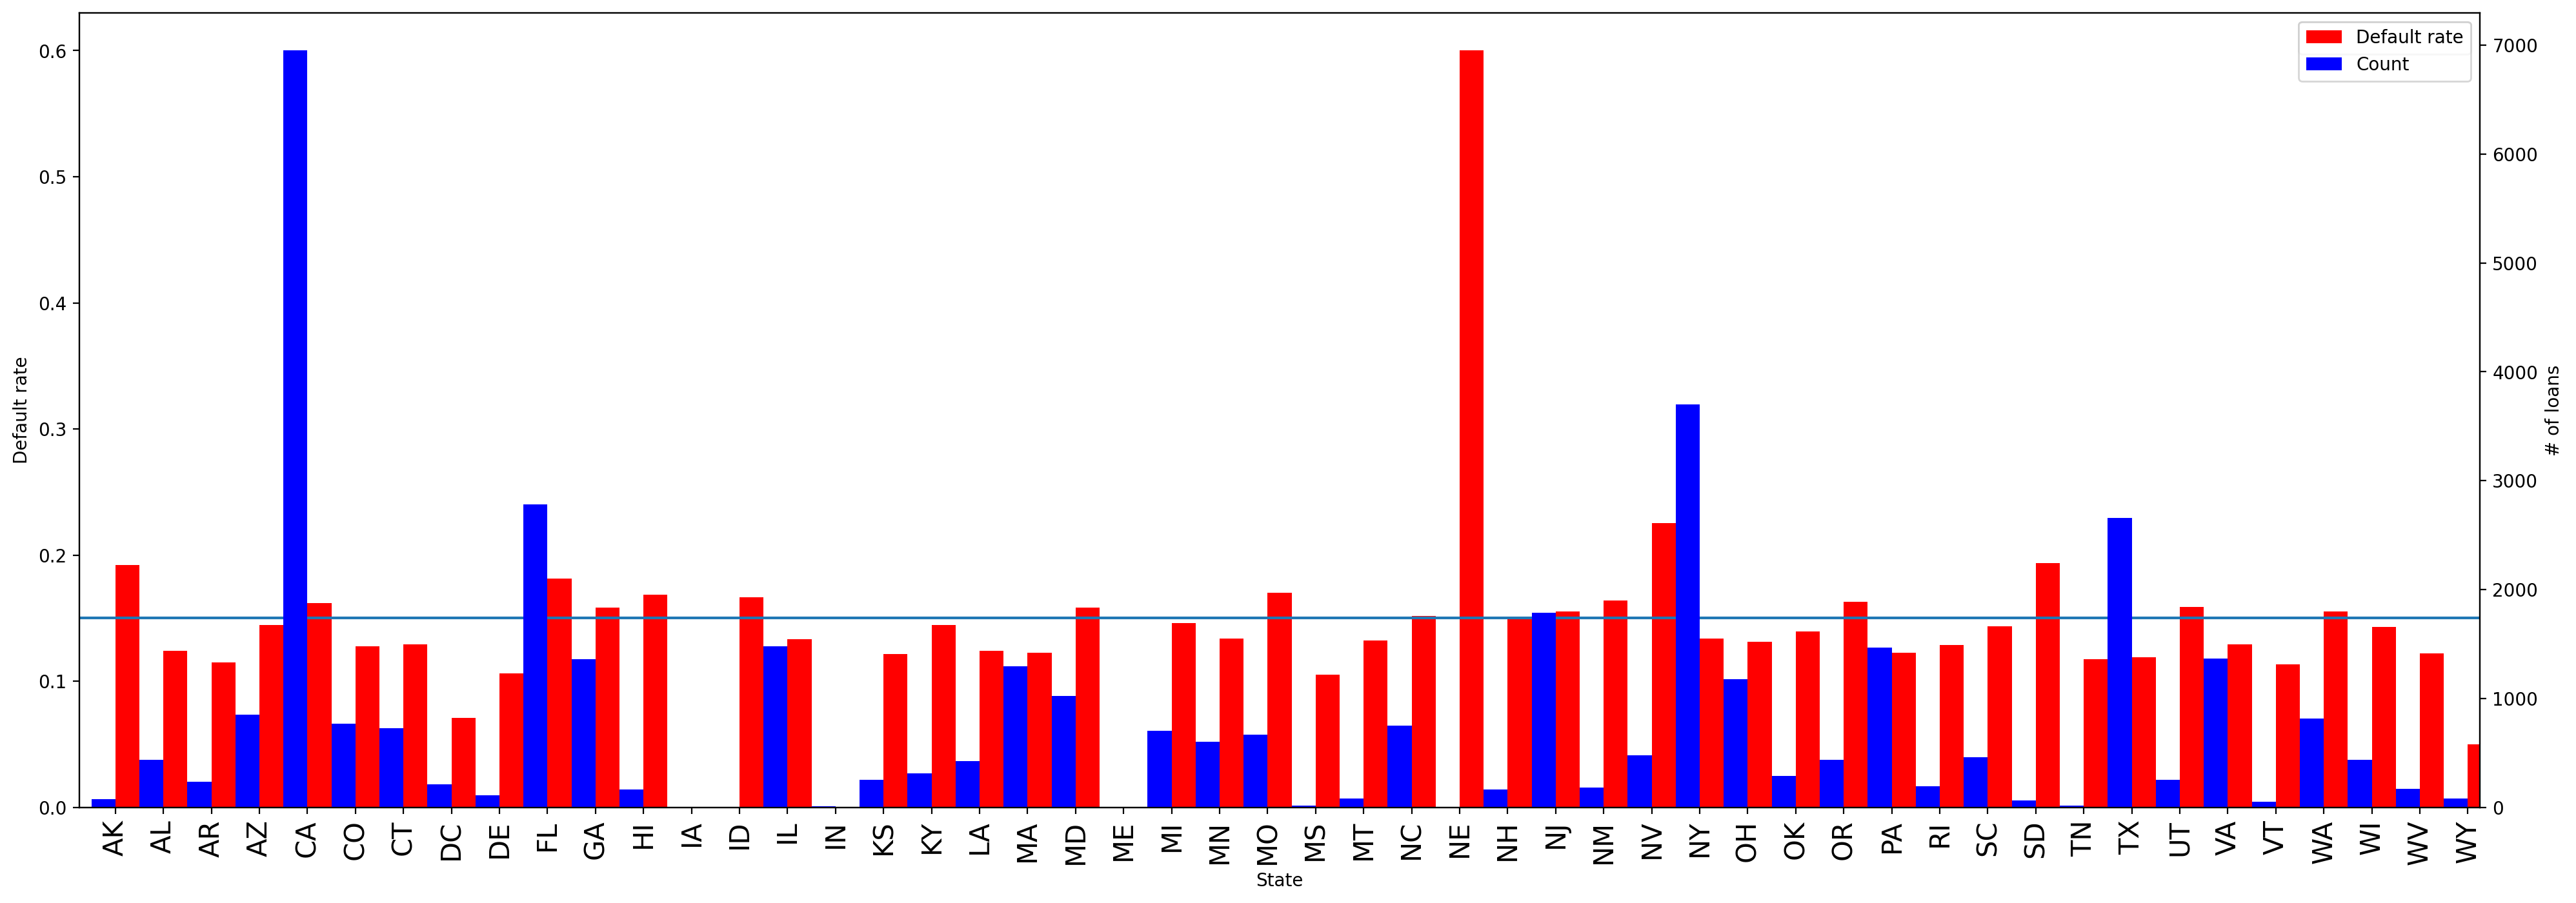

In [50]:
fig = plt.figure(figsize=(24,8),dpi=200)
state_df = loan_df.groupby('addr_state').agg({'default':['mean','count']})
ax=fig.add_subplot()
ax2 = ax.twinx()
ax.set_ylabel('Default rate')
for ax_c in (ax, ax2):
    ax_c.tick_params(axis='x',  labelsize=15)
l = state_df[('default','mean')].plot(kind='bar', color='red', ax=ax,  position=0,label='Default rate',legend=True)

m = state_df[('default','count')].plot(kind='bar', color='blue', ax=ax2, position=1,label='Count',legend=True)
ax.set_xlabel('State')
ax2.set_ylabel('# of loans')
ax.axhline(0.15)

handles,labels = [],[]
for ax in fig.axes:
    for h,l in zip(*ax.get_legend_handles_labels()):
        handles.append(h)
        labels.append(l)

plt.legend(handles,labels)

#### Observations
- Most borrowers are from highly populated states such as California (CA), New York (NY), New Jersey (NJ), and Florida (FL), each with at least 2,000 loans. These states also have high default rates (≥ 15%).
- Nebraska (NE) has the highest default rate, but only 5 loans originate from this state.
- Nevada (NV) also has a high default rate.

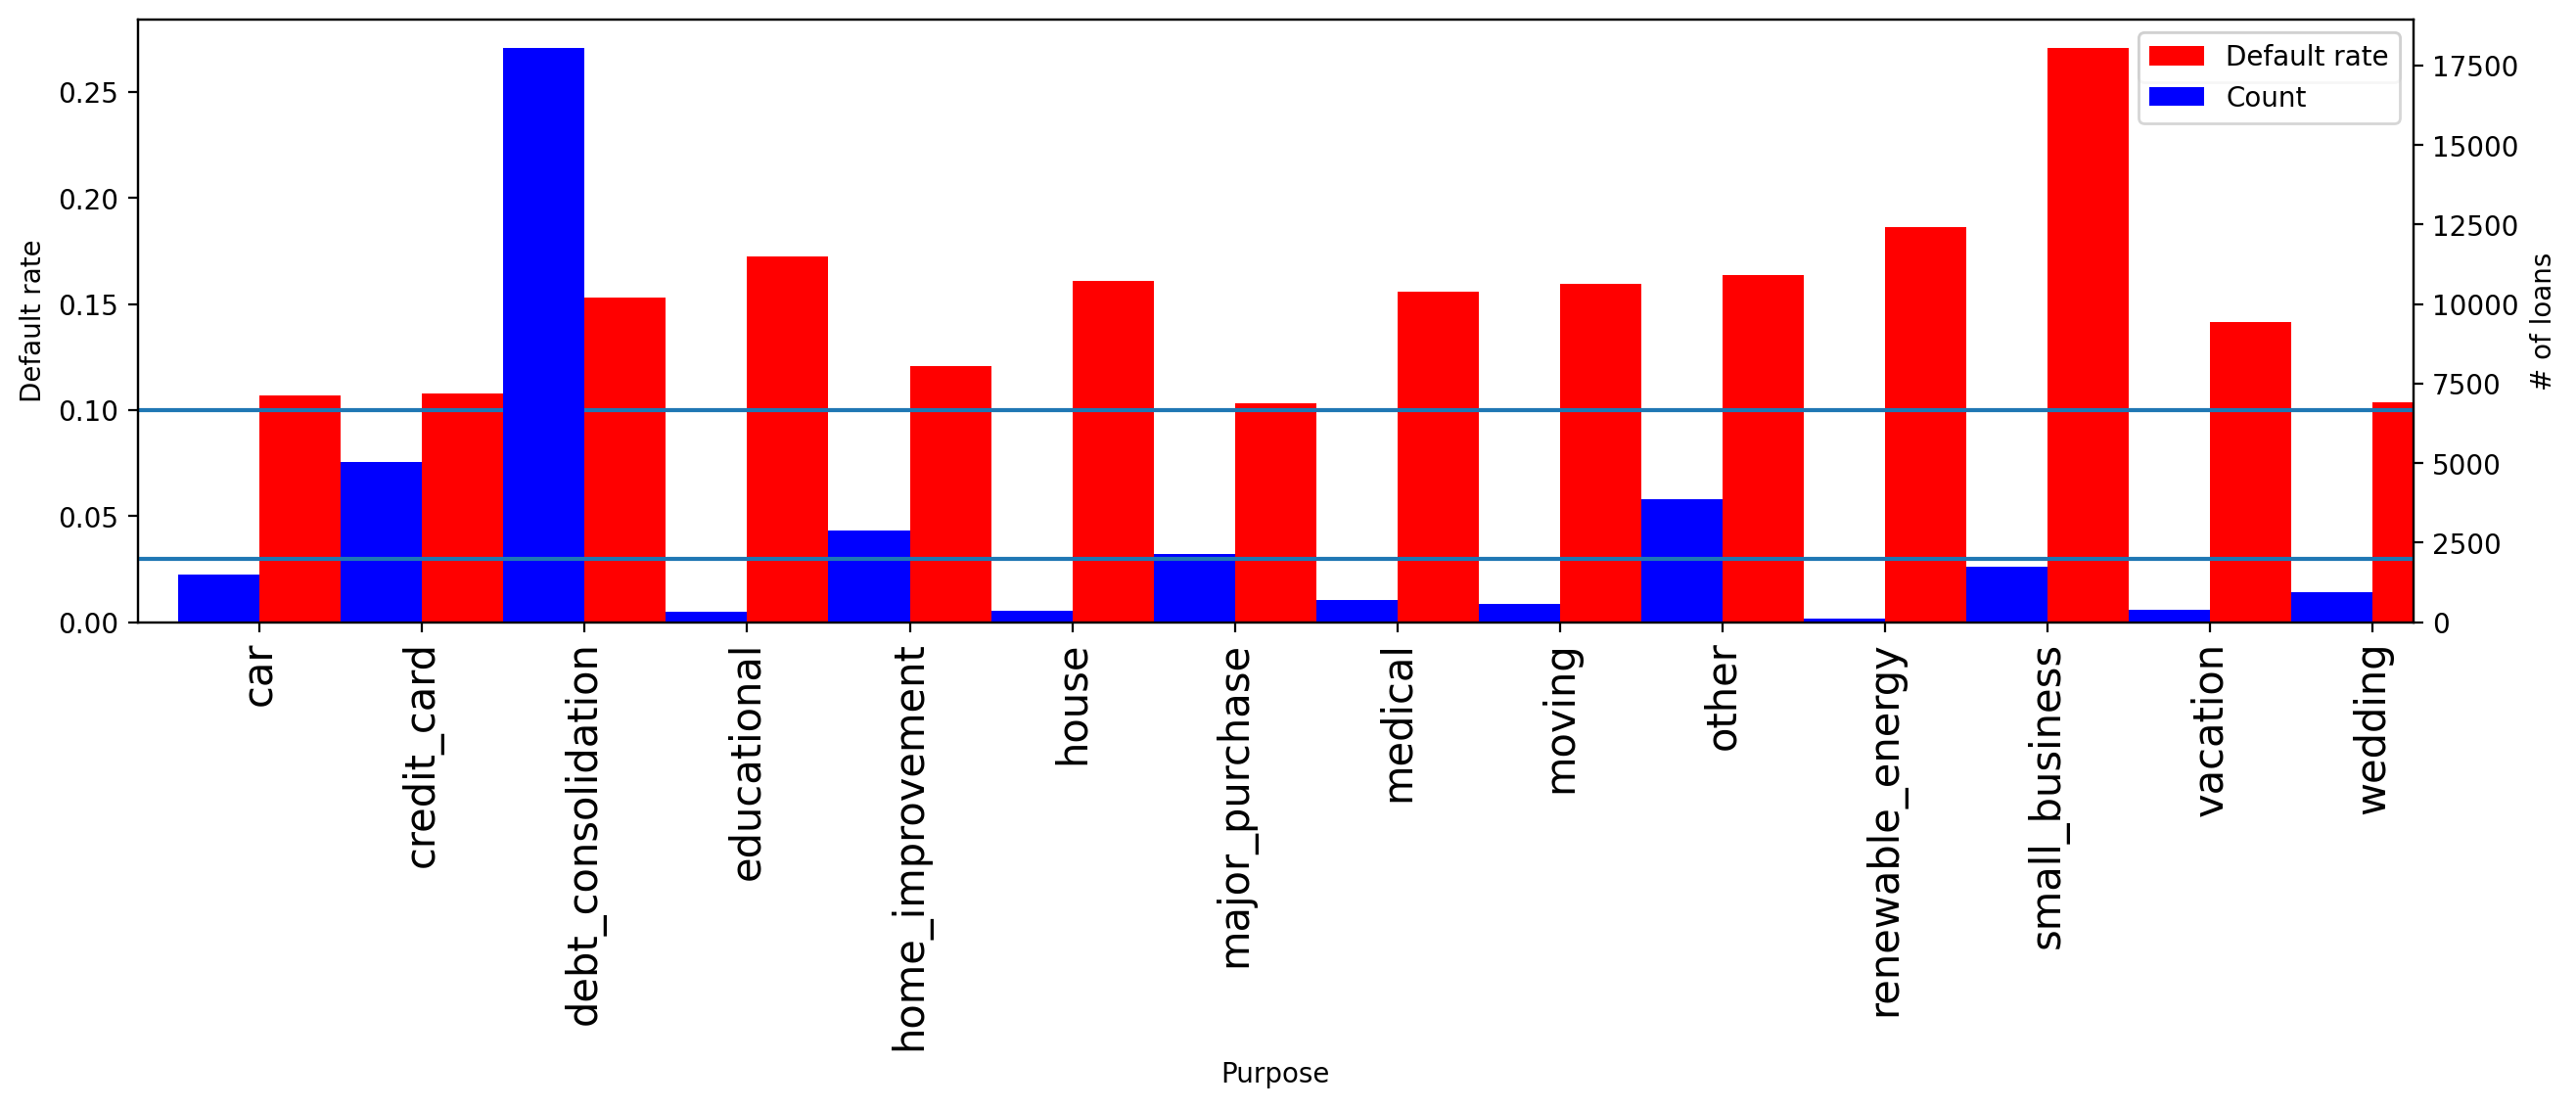

In [51]:
fig = plt.figure(figsize=(15,4),dpi=200)
purpose_df = loan_df.groupby('purpose').agg({'default':['mean','count']})
ax=fig.add_subplot()
ax2 = ax.twinx()
ax.set_ylabel('Default rate')
for ax_c in (ax, ax2):
    ax_c.tick_params(axis='x',  labelsize=15)
l = purpose_df[('default','mean')].plot(kind='bar', color='red', ax=ax,  position=0,label='Default rate',linewidth=1,legend=True)

m = purpose_df[('default','count')].plot(kind='bar', color='blue', ax=ax2, position=1,label='Count',linewidth=1,legend=True)
ax.set_xlabel('Purpose')
ax2.set_ylabel('# of loans')
ax.axhline(0.10)
ax2.axhline(2000)

handles,labels = [],[]
for ax in fig.axes:
    for h,l in zip(*ax.get_legend_handles_labels()):
        handles.append(h)
        labels.append(l)

plt.legend(handles,labels)

#### Observations
- The purposes credit_card, debt_consolidation, home_improvement, and major_purchase each have more than 2,000 loans and at least a 10% default rate.
- Small business loans have the highest median loan amounts and the highest default rate.
- Most of the funds are allocated to debt_consolidation loans, which have a high default rate (above 15%).

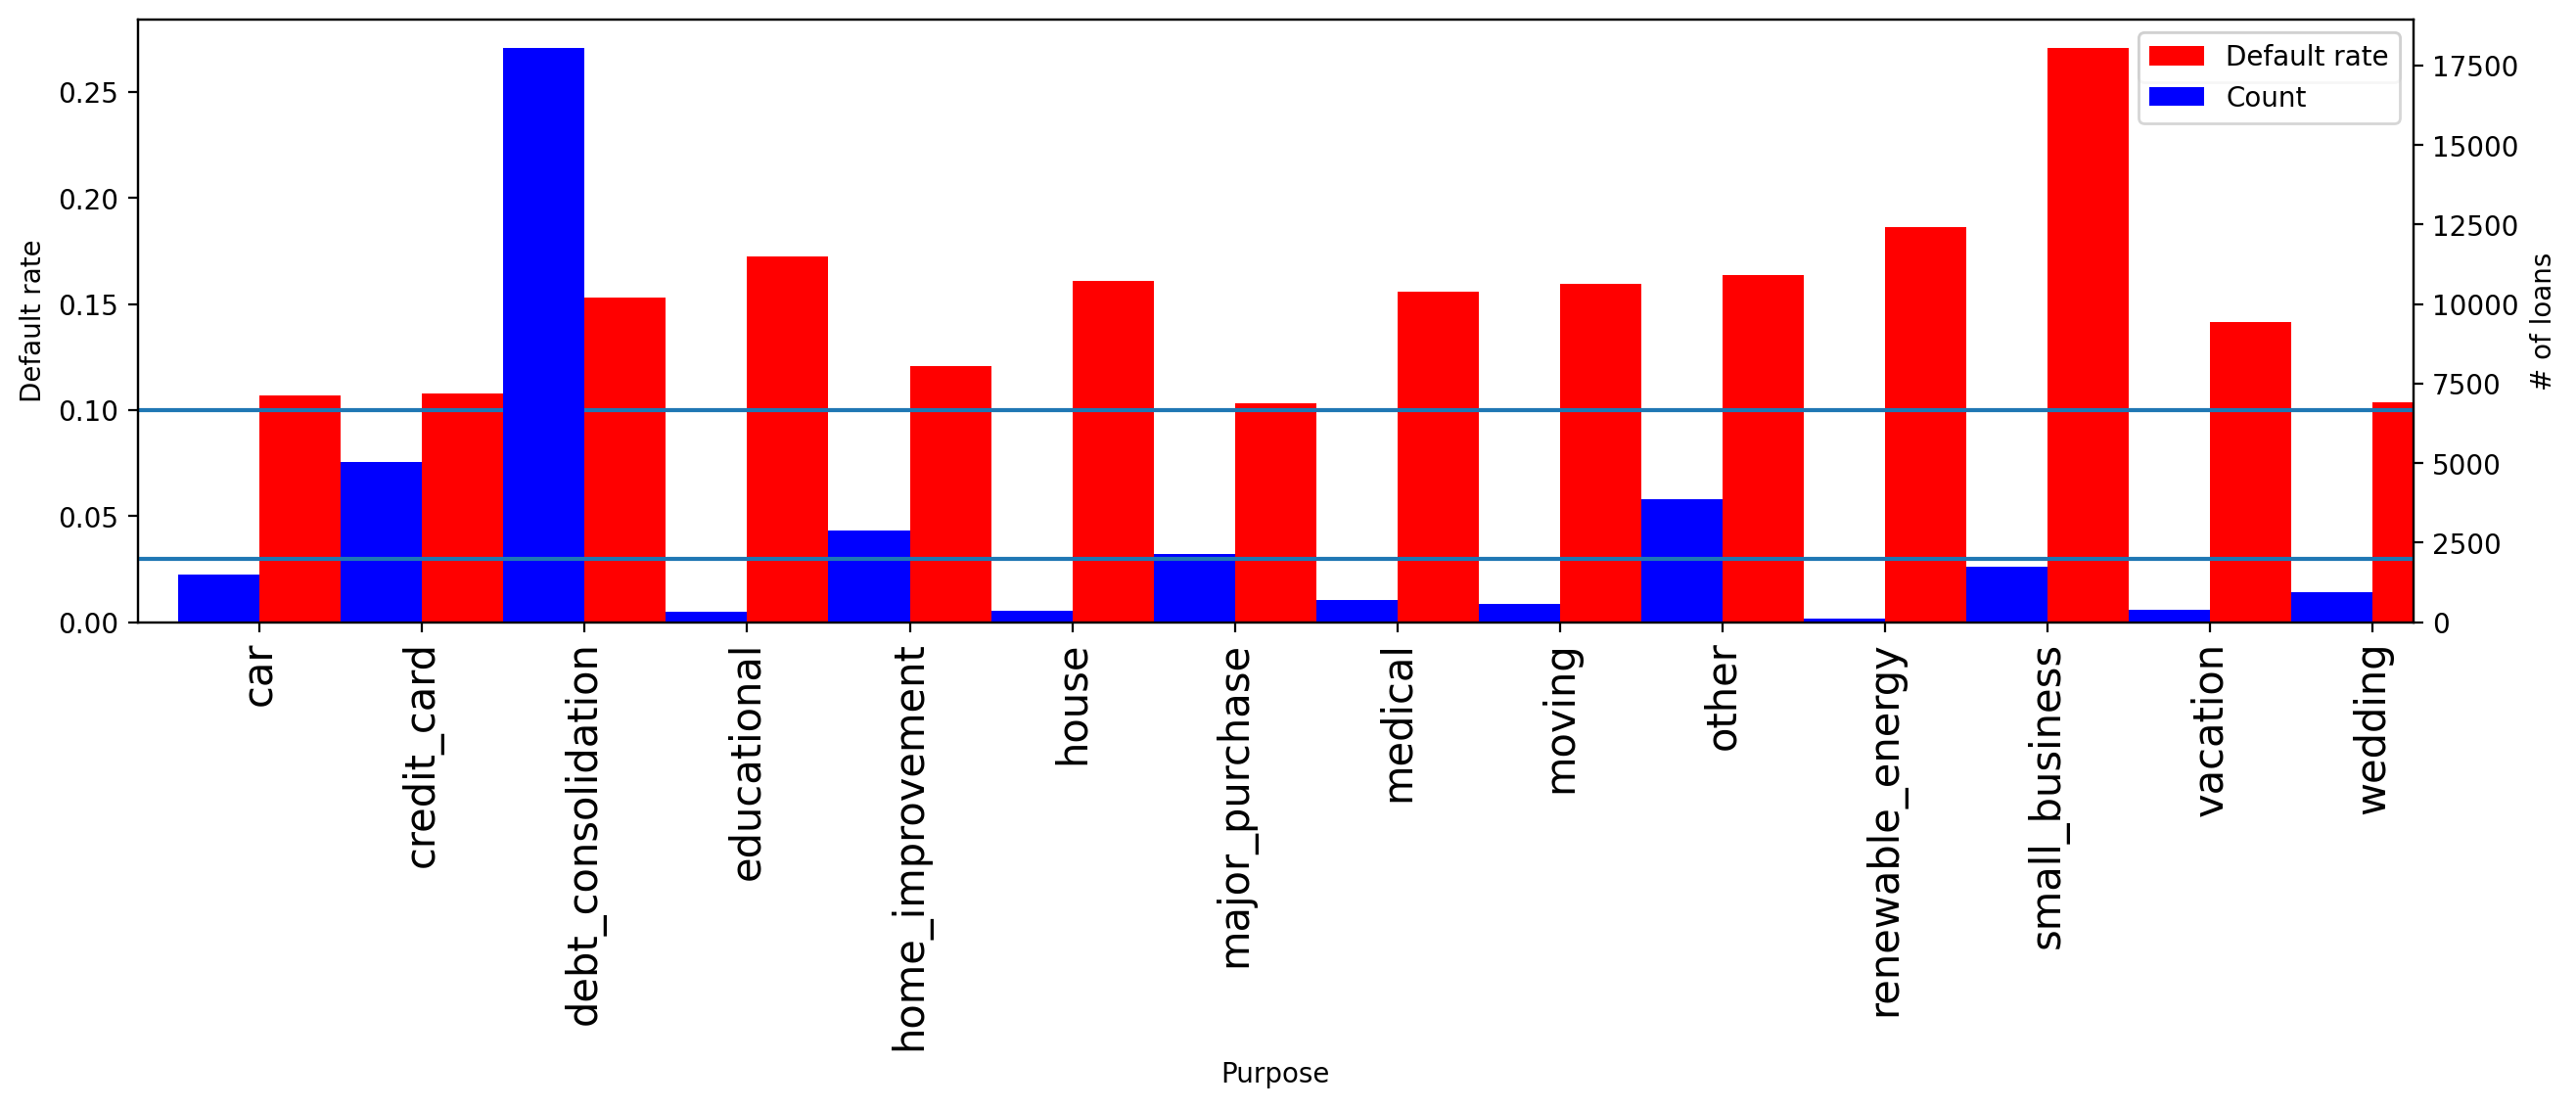

In [52]:
fig = plt.figure(figsize=(15,4),dpi=200)
purpose_df = loan_df.groupby('purpose').agg({'default':['mean','count']})
ax=fig.add_subplot()
ax2 = ax.twinx()
ax.set_ylabel('Default rate')
for ax_c in (ax, ax2):
    ax_c.tick_params(axis='x',  labelsize=15)
l = purpose_df[('default','mean')].plot(kind='bar', color='red', ax=ax,  position=0,label='Default rate',linewidth=1,legend=True)

m = purpose_df[('default','count')].plot(kind='bar', color='blue', ax=ax2, position=1,label='Count',linewidth=1,legend=True)
ax.set_xlabel('Purpose')
ax2.set_ylabel('# of loans')
ax.axhline(0.10)
ax2.axhline(2000)

handles,labels = [],[]
for ax in fig.axes:
    for h,l in zip(*ax.get_legend_handles_labels()):
        handles.append(h)
        labels.append(l)

plt.legend(handles,labels)

Text(0.5, 0, 'Sum of loans')

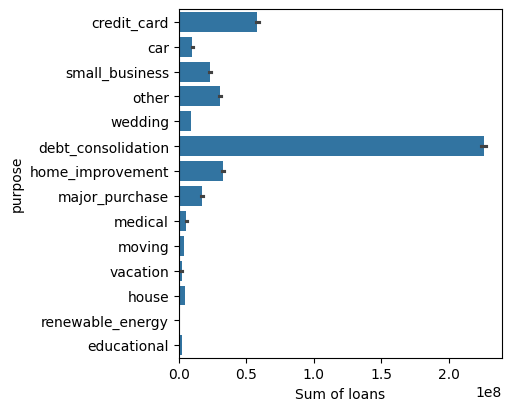

In [53]:
fig, ax = plt.subplots(figsize=[5, 4], constrained_layout=True)
sns.barplot(data=loan_df, y='purpose', x='loan_amnt', estimator=np.sum, orient='h', ax=ax)
ax.set_xlabel('Sum of loans')

Text(0.5, 0, 'Median of loans')

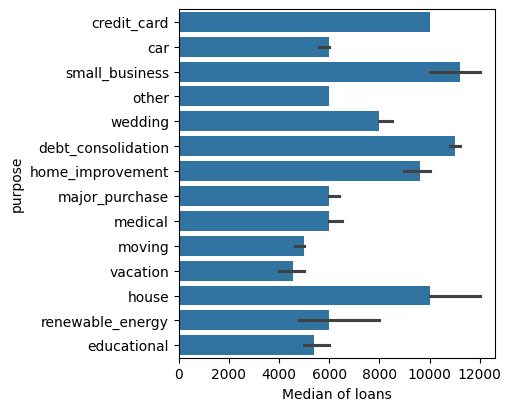

In [54]:
fig, ax = plt.subplots(figsize=[5, 4], constrained_layout=True)
sns.barplot(data=loan_df, y='purpose', x='loan_amnt', estimator=np.median, orient='h', ax=ax)
ax.set_xlabel('Median of loans')

<Axes: xlabel='home_ownership'>

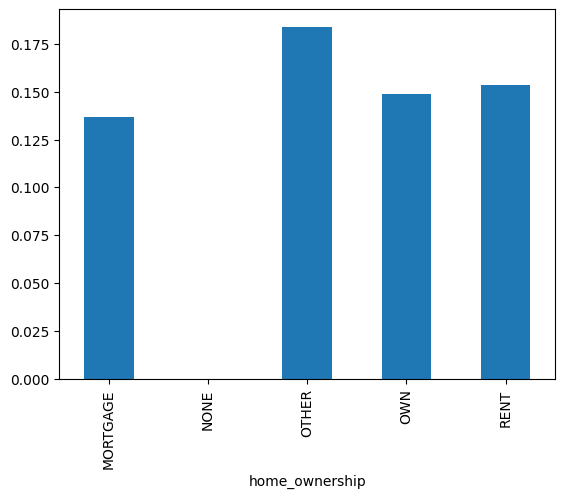

In [55]:
loan_df.groupby('home_ownership')['default'].mean().plot.bar()

<Axes: xlabel='term', ylabel='default'>

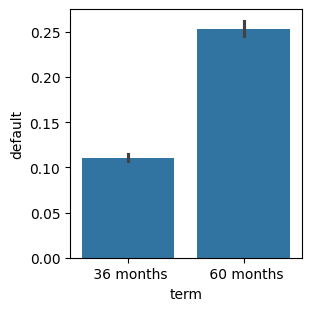

In [56]:
fig, ax = plt.subplots(figsize=[3, 3], constrained_layout=True)
sns.barplot(data=loan_df, x='term', y='default')

#### Observation
- Loans with a term of 60 months are significantly more likely (~15%) to default compared to loans with a term of 36 months.

<Axes: xlabel='verification_status', ylabel='default'>

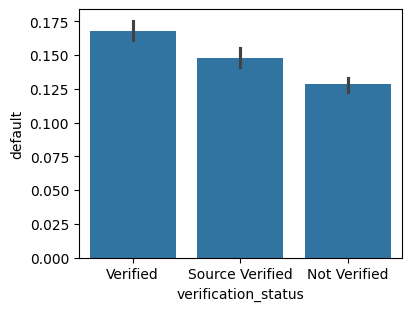

In [57]:
fig, ax = plt.subplots(figsize=[4, 3], constrained_layout=True)
sns.barplot(data=loan_df, x='verification_status', y='default')

<Axes: xlabel='pub_rec_bankruptcies', ylabel='default'>

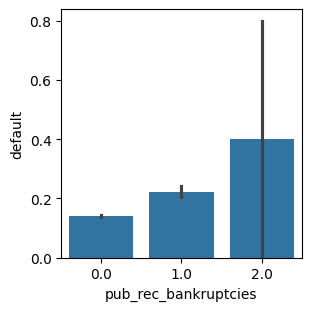

In [58]:
fig, ax = plt.subplots(figsize=[3, 3], constrained_layout=True)
sns.barplot(data=loan_df, x='pub_rec_bankruptcies', y='default')

- Borrowers with a history of bankruptcy are most likely to default. Individuals with two records of bankruptcy have a higher probability of default compared to those with no bankruptcy history.

<Axes: xlabel='emp_length'>

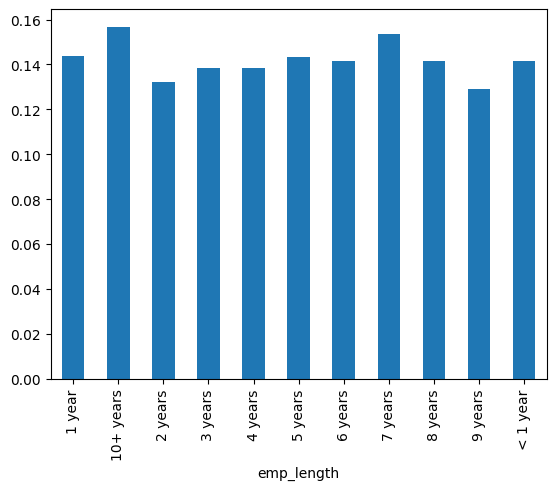

In [59]:
loan_df.groupby('emp_length')['default'].mean().plot.bar()

- The default rate is significantly higher for grades C and above. Notably, grades F5 and G3 stand out with default rates exceeding 40%.

Text(0, 0.5, 'default_rate')

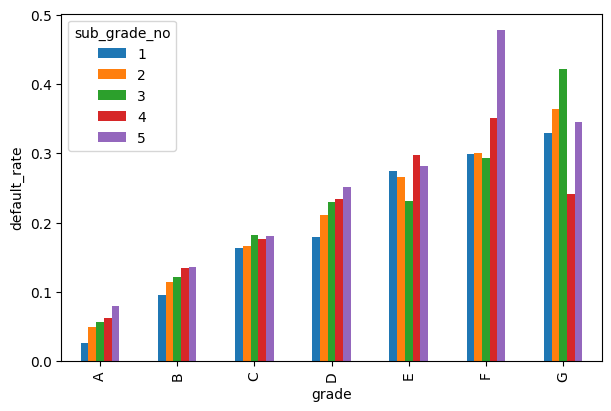

In [60]:
fig, ax = plt.subplots(figsize=[6, 4], constrained_layout=True)
pd.pivot_table(loan_df,index=['grade'],columns=['sub_grade_no'],values='default',aggfunc=np.mean).plot.bar(ax=ax)
ax.set_ylabel('default_rate')

- There is a sharp increase in the default rate for loans with interest rates exceeding 12.5%.
- For interest rates above 20%, the default rate surpasses 30%.

In [61]:
loan_df.int_rate.quantile([0,0.25,0.5,0.75,0.9,1])

0.00     5.42
0.25     8.94
0.50    11.71
0.75    14.38
0.90    16.82
1.00    24.40
Name: int_rate, dtype: float64

In [62]:
loan_df['int_rate_bin']=pd.cut(loan_df.int_rate,[0,5,7.5,10,12.5,15,17.5,20,22.5,25])

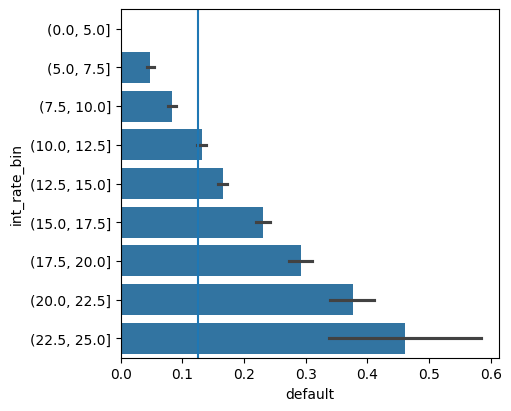

In [63]:

fig, ax = plt.subplots(figsize=[5, 4], constrained_layout=True)
sns.barplot(data=loan_df, y='int_rate_bin', x='default', orient='h')
ax.axvline(0.125)

- Loans issued in 2009, in the wake of the 2007-2008 banking crisis, had a lower default rate, likely due to more cautious lending practices.

<Axes: xlabel='issue_year', ylabel='default'>

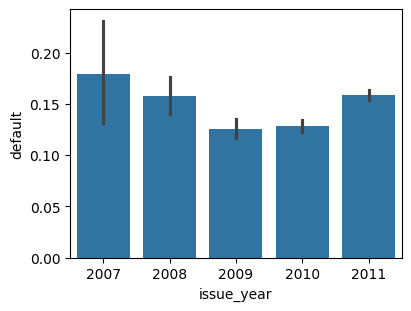

In [64]:
fig, ax = plt.subplots(figsize=[4, 3], constrained_layout=True)
sns.barplot(data=loan_df, x='issue_year', y='default')

- Borrowers with higher annual incomes tend to apply for larger loan amounts.

<Axes: xlabel='annual_inc', ylabel='loan_amnt'>

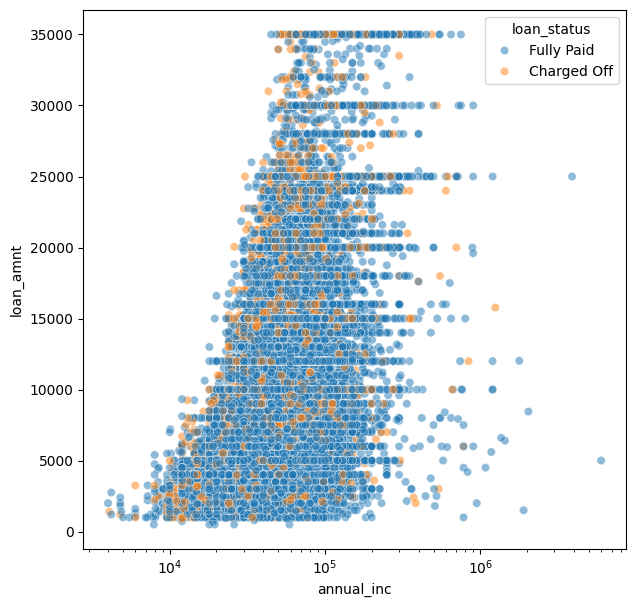

In [65]:
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log")
sns.scatterplot(data=loan_df, hue='loan_status', x='annual_inc', y='loan_amnt', alpha=0.5, ax=ax)

## Recommendations
### Discontinue
- Loans to borrowers with more than one public record of bankruptcy
- Loans to Grade F borrowers
- Loans with an interest rate above 20%
### Reduce
- Loans to borrowers with annual incomes less than $15,000
- Loans to borrowers in Florida, New York, Nevada, California, or Texas
- Loans to borrowers with grades above 'C'
- Loans with an interest rate above 12.5%
- Loans with a term of 60 months
### Increase
- Loans with interest rates between 7.5% and 10%
- Loans to Grade 'A' borrowers
- Loans to borrowers with zero public record bankruptcies
- Loans with a term of 36 months
- Loans for credit card consolidation purposes
- Loans with smaller amounts
- Loans to borrowers with lower debt-to-income ratios

### Additional Analysis

Text(0, 0.5, 'count')

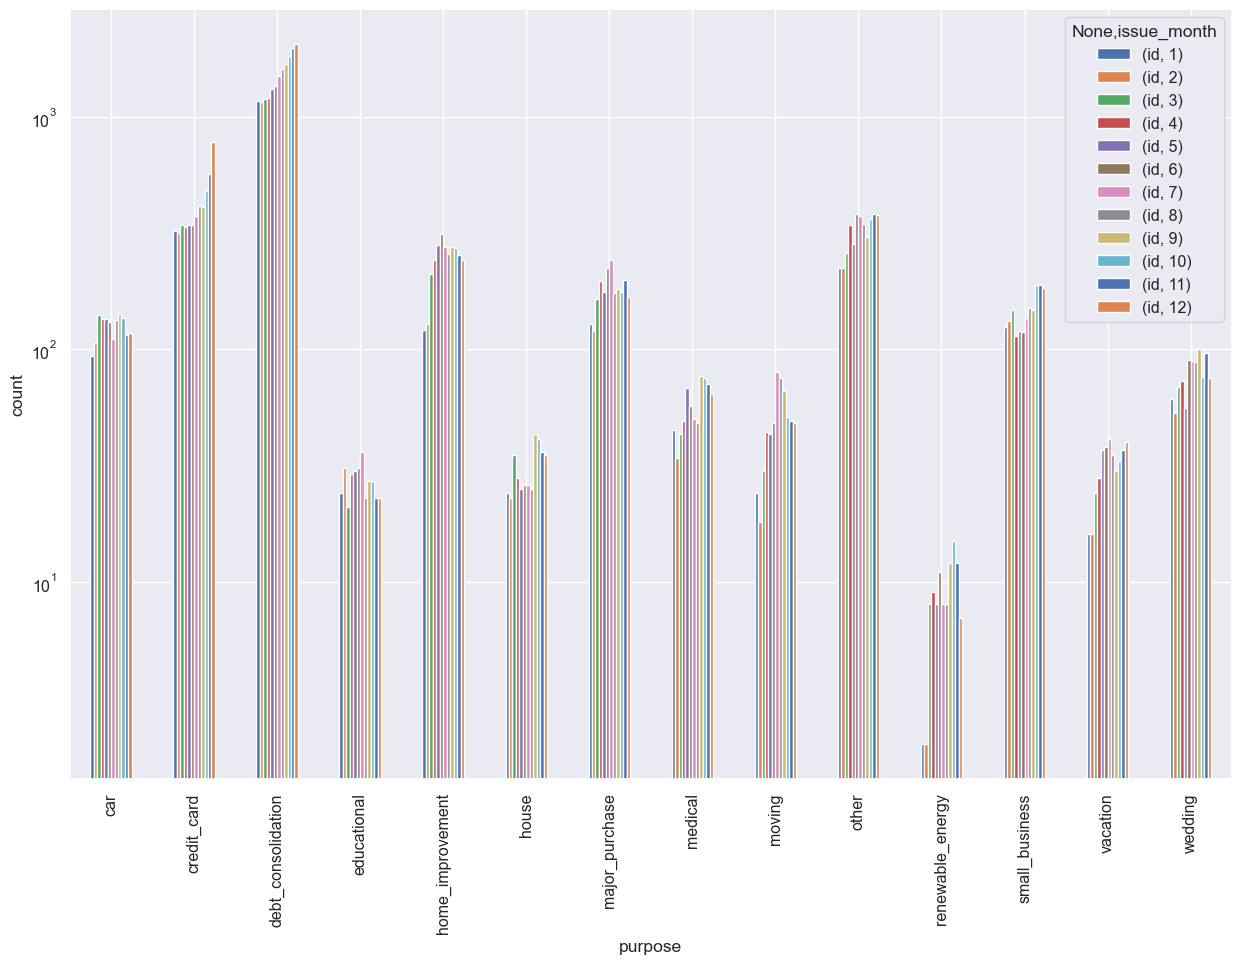

In [66]:
sns.set(font_scale=1.05)
ax=pd.pivot_table(loan_df,index=['purpose'],columns=['issue_month'], values=['id'], aggfunc='count').plot.bar(figsize=[15,10])
ax.set_yscale('log')
ax.set_ylabel('count')

<Axes: xlabel='grade', ylabel='Interest_rate'>

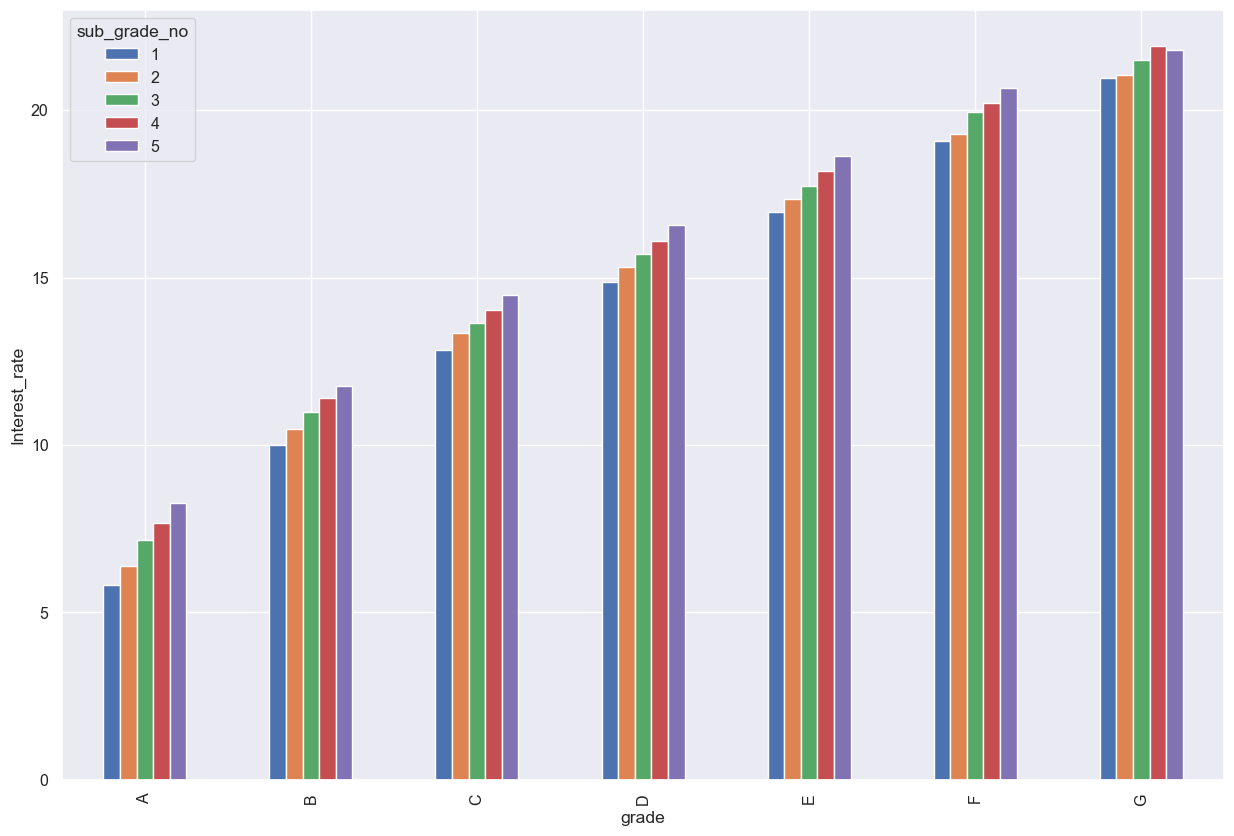

In [67]:
pd.pivot_table(loan_df,index=['grade'],columns=['sub_grade_no'],values='int_rate',aggfunc=np.mean).plot.bar(figsize=[15,10],ylabel='Interest_rate')

## Visualization for Key Findings

### 1. Default Rates by Loan Amount

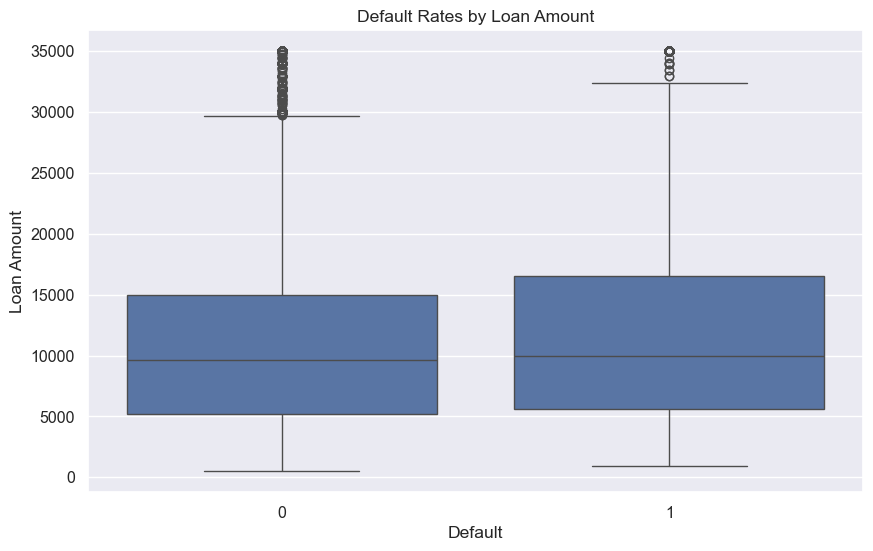

In [68]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='default', y='loan_amnt', data=loan_df)
plt.title('Default Rates by Loan Amount')
plt.xlabel('Default')
plt.ylabel('Loan Amount')
plt.show()


### 2. Interest Rates and Default

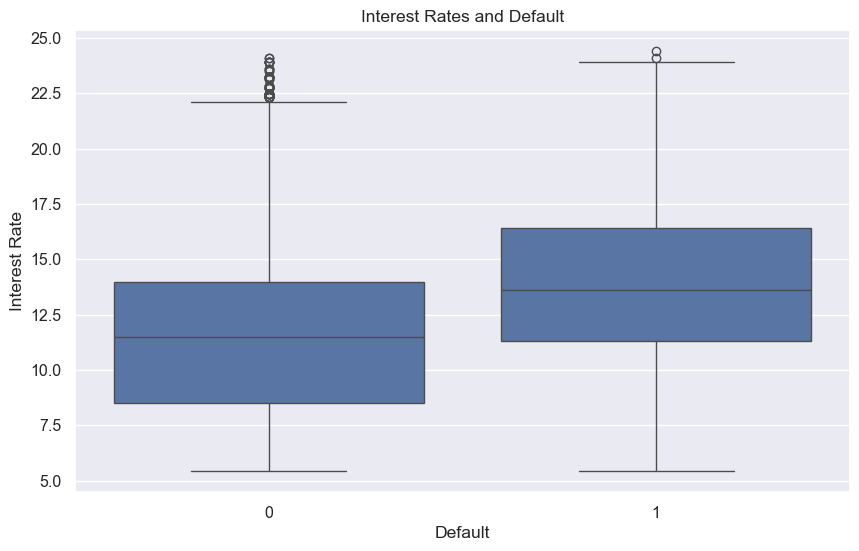

In [69]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='default', y='int_rate', data=loan_df)
plt.title('Interest Rates and Default')
plt.xlabel('Default')
plt.ylabel('Interest Rate')
plt.show()


### 3. Annual Income Influence

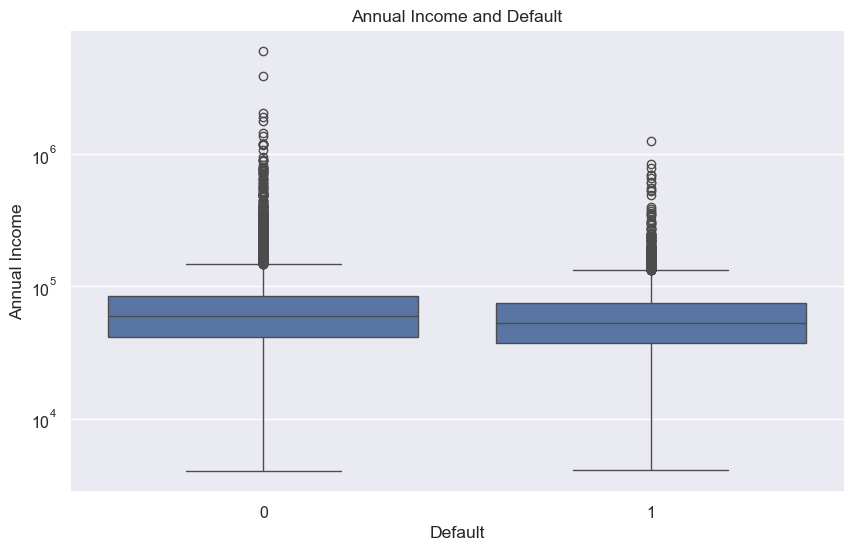

In [70]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='default', y='annual_inc', data=loan_df)
plt.title('Annual Income and Default')
plt.xlabel('Default')
plt.ylabel('Annual Income')
plt.yscale('log')
plt.show()


### 4. Debt-to-Income Ratio (DTI)

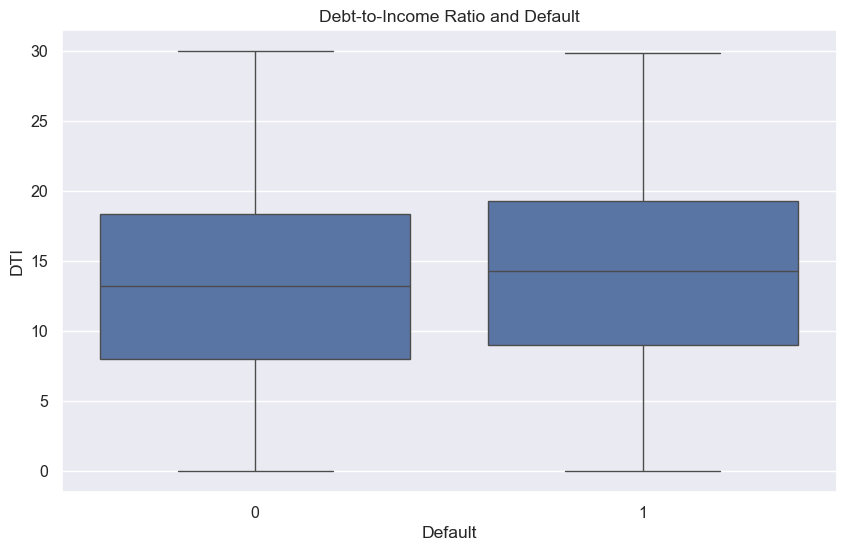

In [71]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='default', y='dti', data=loan_df)
plt.title('Debt-to-Income Ratio and Default')
plt.xlabel('Default')
plt.ylabel('DTI')
plt.show()


### 5. Term of the Loan

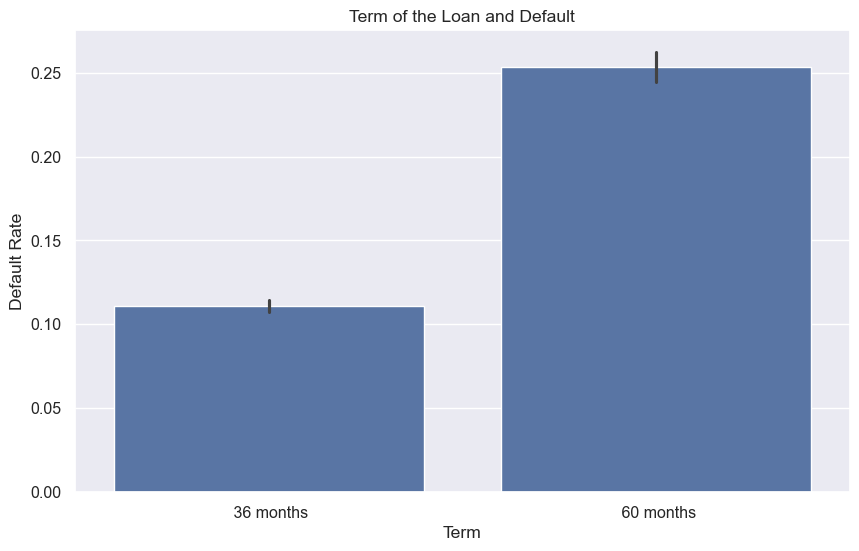

In [72]:
plt.figure(figsize=(10, 6))
sns.barplot(x='term', y='default', data=loan_df, estimator=np.mean)
plt.title('Term of the Loan and Default')
plt.xlabel('Term')
plt.ylabel('Default Rate')
plt.show()


### 6. Home Ownership

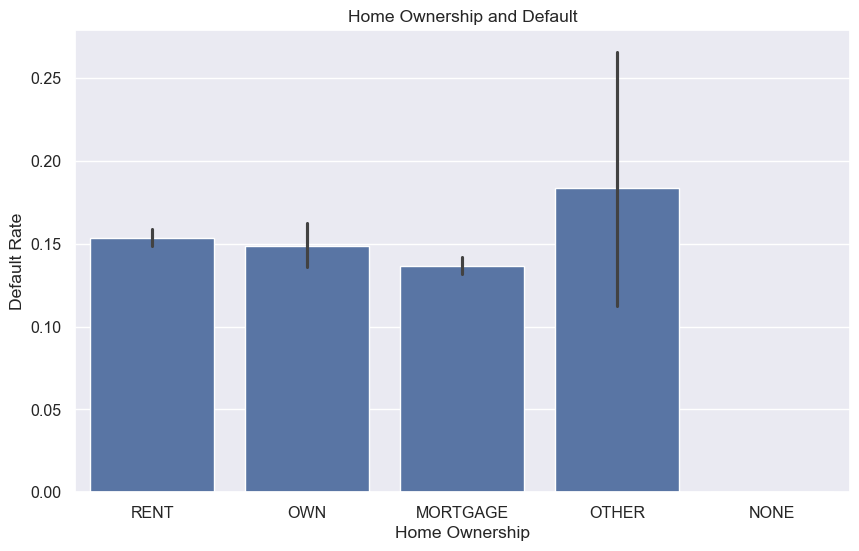

In [73]:
plt.figure(figsize=(10, 6))
sns.barplot(x='home_ownership', y='default', data=loan_df, estimator=np.mean)
plt.title('Home Ownership and Default')
plt.xlabel('Home Ownership')
plt.ylabel('Default Rate')
plt.show()


### 7. Verification Status

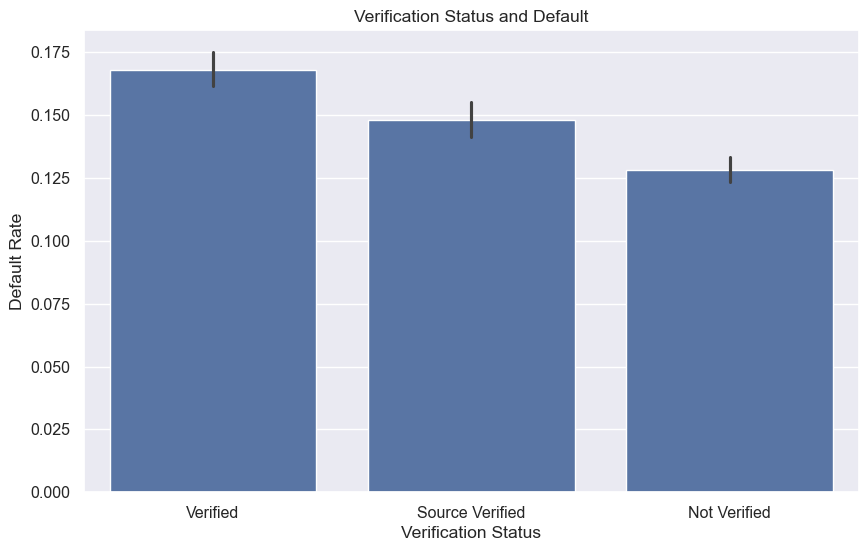

In [74]:
plt.figure(figsize=(10, 6))
sns.barplot(x='verification_status', y='default', data=loan_df, estimator=np.mean)
plt.title('Verification Status and Default')
plt.xlabel('Verification Status')
plt.ylabel('Default Rate')
plt.show()


### 8. Employment Length

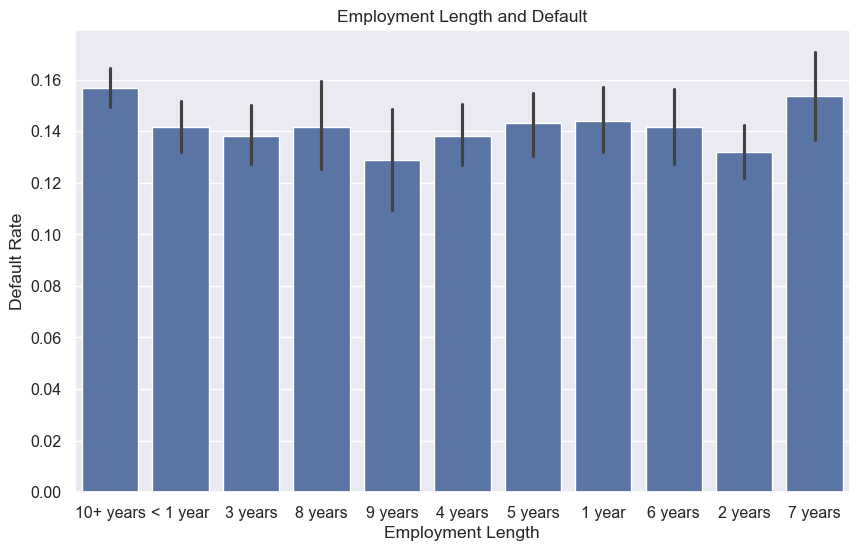

In [75]:
plt.figure(figsize=(10, 6))
sns.barplot(x='emp_length', y='default', data=loan_df, estimator=np.mean)
plt.title('Employment Length and Default')
plt.xlabel('Employment Length')
plt.ylabel('Default Rate')
plt.show()


### 9. Loan Purpose

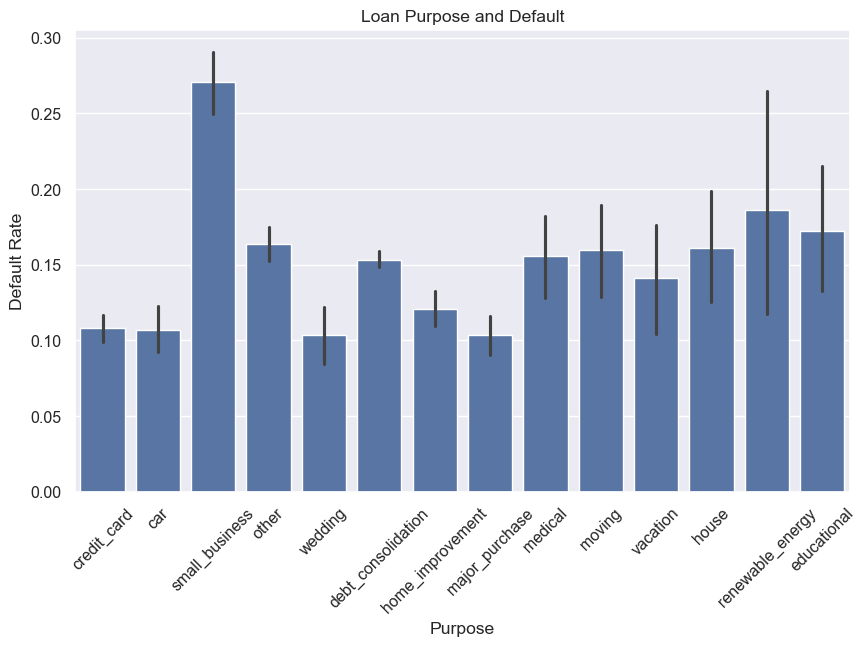

In [76]:
plt.figure(figsize=(10, 6))
sns.barplot(x='purpose', y='default', data=loan_df, estimator=np.mean)
plt.title('Loan Purpose and Default')
plt.xlabel('Purpose')
plt.ylabel('Default Rate')
plt.xticks(rotation=45)
plt.show()


### 10. Geographic Influence

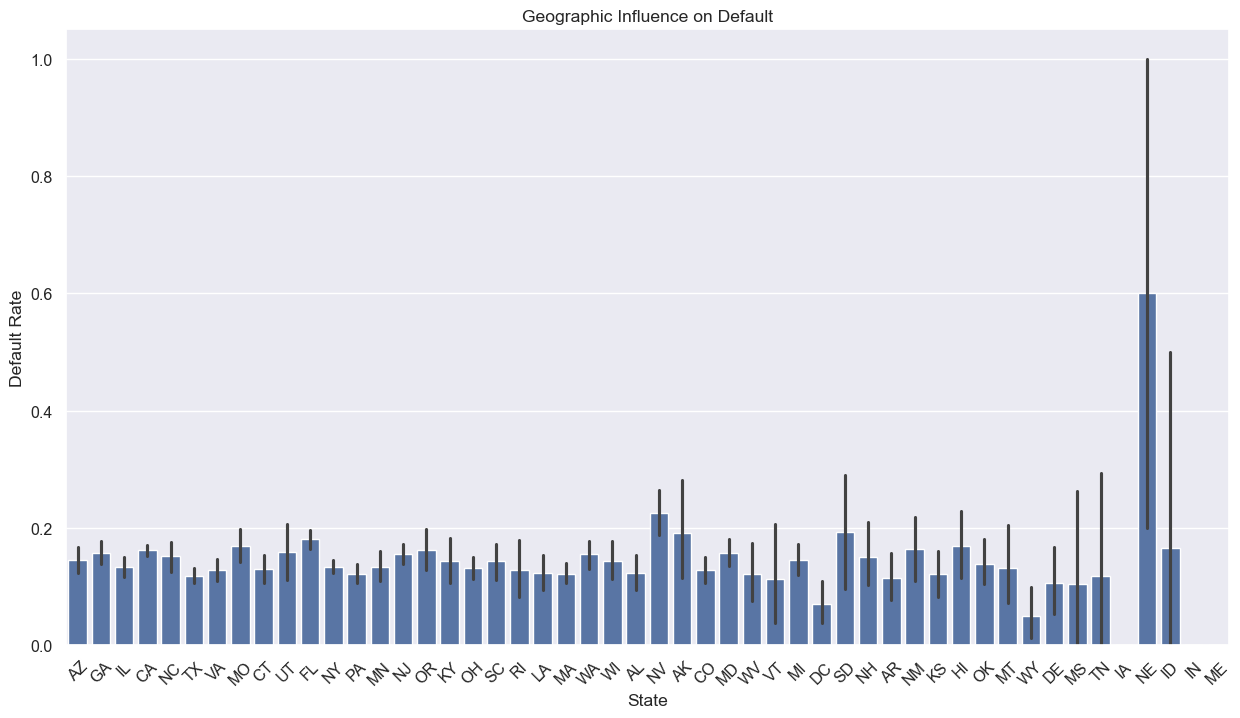

In [77]:
plt.figure(figsize=(15, 8))
sns.barplot(x='addr_state', y='default', data=loan_df, estimator=np.mean)
plt.title('Geographic Influence on Default')
plt.xlabel('State')
plt.ylabel('Default Rate')
plt.xticks(rotation=45)
plt.show()


### 11. Public Record Bankruptcies

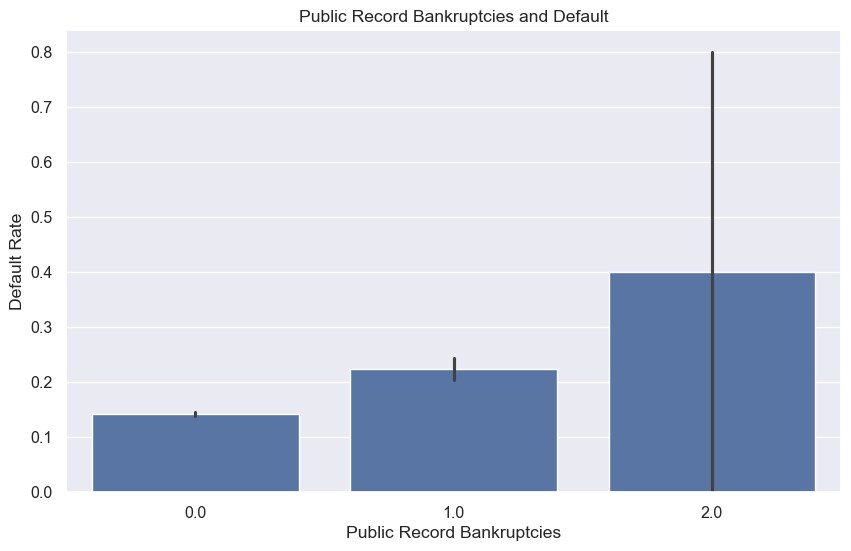

In [78]:
plt.figure(figsize=(10, 6))
sns.barplot(x='pub_rec_bankruptcies', y='default', data=loan_df, estimator=np.mean)
plt.title('Public Record Bankruptcies and Default')
plt.xlabel('Public Record Bankruptcies')
plt.ylabel('Default Rate')
plt.show()
